<h1>kNN model on kaggle-pet competition</h1>

we are following Stanford CS231n, and trying to apply their assignements to this competition.

CS231N: http://cs231n.github.io/assignments2018/assignment1/
<p>sci-kit knn: https://scikit-learn.org/stable/modules/neighbors.html

Main differences between assignment and this notebook:
    - we will be using sci-kit implementation of knn and not written by us
    

<h1>DATA LOADING

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
os.listdir('../../data')
assert 'out_breed.csv' in os.listdir('../../data') # this assert breaks if the data is configured uncorrectly

In [3]:
breeds = pd.read_csv('../../data/out_breed.csv')
colors = pd.read_csv('../../data/out_color.csv')
states = pd.read_csv('../../data/out_state.csv')
train  = pd.read_csv('../../data/out_train.csv')
test   = pd.read_csv('../../data/out_test.csv')
sub    = pd.read_csv('../../data/out_submission.csv')

<h1>MODEL</h1>

In [4]:
from knnModel import PredictiveModel

<h1>EXAMPLE USAGE</h1>

In [5]:
"""
this is a really primitive data cleaning to make KNN works: we drop the followings
- AdoptionSpeed, is target
- Unnamed:0, dataset_type, is useless
- Name, RescuerId, Description, PhotoAmt, VideoAmt, PetID: this are all strings valued not able to be processed by KNN
"""
X = train.drop(["AdoptionSpeed", "Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description", "PhotoAmt","VideoAmt","PetID"], axis=1)
X_test = test.drop(["Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description", "PhotoAmt","VideoAmt","PetID"], axis=1)

"""
Y is our target value, Adoption Speed can be a value [1,2,3,4]
"""
Y = train['AdoptionSpeed']

assert X.shape[0] == Y.shape[0]

In [6]:
model = PredictiveModel("example_usage_model")
model.train(X, Y)
predictions = model.predict(X_test)
assert len(predictions)

Thu Mar 21 22:49:45 2019 [example_usage_model.__init__] initialized succesfully


<h1>VALIDATION

In [7]:
"""
this is a really primitive data cleaning to make KNN works: we drop the followings
- AdoptionSpeed, is target
- Unnamed:0, dataset_type, is useless
- Name, RescuerId, Description, PhotoAmt, VideoAmt, PetID: this are all strings valued not able to be processed by KNN
"""
X = train.drop(["AdoptionSpeed", "Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description", "PhotoAmt","VideoAmt","PetID"], axis=1)
X_test = test.drop(["Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description", "PhotoAmt","VideoAmt","PetID"], axis=1)

"""
Y is our target value, Adoption Speed can be a value [1,2,3,4]
"""
Y = train['AdoptionSpeed']

assert X.shape[0] == Y.shape[0]

In [8]:
model = PredictiveModel("validation_model_Oana")

Thu Mar 21 22:49:47 2019 [validation_model_Oana.__init__] initialized succesfully


In [9]:
model.validation(X, Y, method=1)

0.13190454691363668

In [10]:
model.validation(X, Y, method=2)

0.13084716768508242

<h1>Scoring

In [11]:
to_drop = ["Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description", "PhotoAmt","VideoAmt","PetID"]

X = train.drop(["AdoptionSpeed"] + to_drop , axis=1)
X_test = test.drop(to_drop, axis=1)

Y = train['AdoptionSpeed']

assert X.shape[0] == Y.shape[0]

In [12]:
best = [0, 0]
for k in range(1, 40):
    model = PredictiveModel("bestK", k)
    score = model.validation(X, Y, method=2, verbose="False")
    if score > best[0]: best = [score, k]

Thu Mar 21 22:49:54 2019 [bestK.__init__] initialized succesfully
Thu Mar 21 22:49:54 2019 [bestK.validation] start validation method 2
Thu Mar 21 22:49:54 2019 [bestK.validation] single score = 0.11891848840541919 
Thu Mar 21 22:49:55 2019 [bestK.validation] single score = 0.11673125822161978 
Thu Mar 21 22:49:55 2019 [bestK.validation] single score = 0.10817703943995638 
Thu Mar 21 22:49:55 2019 [bestK.validation] single score = 0.11346118603638533 
Thu Mar 21 22:49:56 2019 [bestK.validation] single score = 0.10302980624404434 
Thu Mar 21 22:49:56 2019 [bestK.validation] validation score = 0.112063555669485 
Thu Mar 21 22:49:56 2019 [bestK.validation] finished validation method 2
Thu Mar 21 22:49:56 2019 [bestK.__init__] initialized succesfully
Thu Mar 21 22:49:56 2019 [bestK.validation] start validation method 2
Thu Mar 21 22:49:56 2019 [bestK.validation] single score = 0.08967505970250489 
Thu Mar 21 22:49:56 2019 [bestK.validation] single score = 0.08411824254407008 
Thu Mar 21 22

KeyboardInterrupt: 

In [ ]:
best

In [ ]:
to_drop = ["Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description","PetID"]

X = train.drop(["AdoptionSpeed"] + to_drop , axis=1)
X_test = test.drop(to_drop, axis=1)

Y = train['AdoptionSpeed']

assert X.shape[0] == Y.shape[0]

In [ ]:
model = PredictiveModel("with images number", 25)
model.validation(X, Y, method=2, verbose=False)

In [ ]:
to_drop = ["Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description","PetID"]

X = train.drop(["AdoptionSpeed"] + to_drop , axis=1)
X_test = test.drop(to_drop, axis=1)

Y = train['AdoptionSpeed']

assert X.shape[0] == Y.shape[0]

In [ ]:
scaled = pd.DataFrame()
for col in X:
    df = X[col]
    scaled[col] = (df - df.mean()) / (df.max() - df.min())

In [ ]:
model = PredictiveModel("scaled", 25)
model.validation(scaled, Y, method=2, verbose=False)

In [ ]:
scaled['Type'] = scaled['Type']*100

In [ ]:
model = PredictiveModel("scaled", 25)
model.validation(scaled, Y, method=2, verbose=False)

In [13]:
# cats dogs
dogs = train[train['Type'] == 1].drop('Type',axis=1)
cats = train[train['Type'] == 2].drop('Type',axis=1)

In [14]:
to_drop = ["Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description","PetID"]

X = cats.drop(["AdoptionSpeed"] + to_drop , axis=1)
Y = cats['AdoptionSpeed']
X = X.reset_index().drop('index',axis=1)
Y = Y.reset_index().drop('index',axis=1)['AdoptionSpeed']

assert X.shape[0] == Y.shape[0]

In [18]:
model = PredictiveModel("cats", 100)
model.validation(X, Y, method=2, verbose=False)

Thu Mar 21 22:50:36 2019 [cats.__init__] initialized succesfully


0.1613138501198026

In [16]:
to_drop = ["Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description","PetID"]

X = dogs.drop(["AdoptionSpeed"] + to_drop , axis=1)
Y = dogs['AdoptionSpeed']
X = X.reset_index().drop('index',axis=1)
Y = Y.reset_index().drop('index',axis=1)['AdoptionSpeed']

assert X.shape[0] == Y.shape[0]

<h1>HIGHEST UP TO NOW

In [17]:
model = PredictiveModel("dogs", 100)
model.validation(X, Y, method=2, verbose=False)

Thu Mar 21 22:50:21 2019 [dogs.__init__] initialized succesfully


0.1613138501198026

In [19]:
scaled = pd.DataFrame()
for col in X:
    df = X[col]
    scaled[col] = (df - df.mean()) / (df.max() - df.min())

In [20]:
model = PredictiveModel("dogs", 100)
model.validation(scaled, Y, method=2, verbose=False)

Thu Mar 21 22:50:44 2019 [dogs.__init__] initialized succesfully


0.09974435774284549

------------------
<h1>MODEL/DATA EXPLORATION</h1>

In [59]:
def score_knn(space=[25,50,100,150,200],name="score_knn"):
    # X in memory
    from matplotlib import pyplot as plt
    score = []
    for k in space:
        model = PredictiveModel(name, k)
        score.append(model.validation(X, Y, method=2, verbose=False))
    plt.plot(score)
    plt.show()
    print(max(score))

Thu Mar 21 22:56:49 2019 [dogs.__init__] initialized succesfully
Thu Mar 21 22:56:50 2019 [dogs.__init__] initialized succesfully
Thu Mar 21 22:56:51 2019 [dogs.__init__] initialized succesfully
Thu Mar 21 22:56:53 2019 [dogs.__init__] initialized succesfully
Thu Mar 21 22:56:54 2019 [dogs.__init__] initialized succesfully


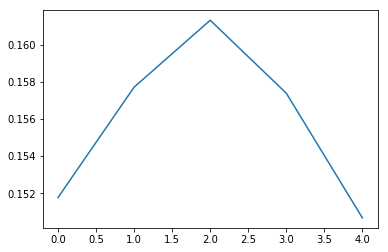

0.1613138501198026


In [42]:
score_knn()

In [46]:
X['Color1'] = X['Color1'] * 10

Thu Mar 21 22:58:27 2019 [dogs.__init__] initialized succesfully
Thu Mar 21 22:58:28 2019 [dogs.__init__] initialized succesfully
Thu Mar 21 22:58:29 2019 [dogs.__init__] initialized succesfully
Thu Mar 21 22:58:31 2019 [dogs.__init__] initialized succesfully
Thu Mar 21 22:58:32 2019 [dogs.__init__] initialized succesfully


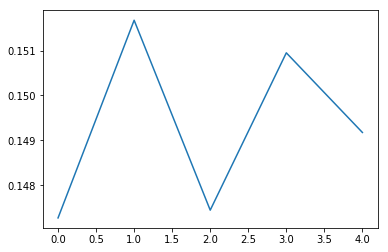

0.151677305842709


In [48]:
score_knn()

In [50]:
X=X.drop(['Color1','Color2','Color3'],axis=1)

Thu Mar 21 23:00:28 2019 [dogs.__init__] initialized succesfully
Thu Mar 21 23:00:29 2019 [dogs.__init__] initialized succesfully
Thu Mar 21 23:00:30 2019 [dogs.__init__] initialized succesfully
Thu Mar 21 23:00:31 2019 [dogs.__init__] initialized succesfully
Thu Mar 21 23:00:32 2019 [dogs.__init__] initialized succesfully


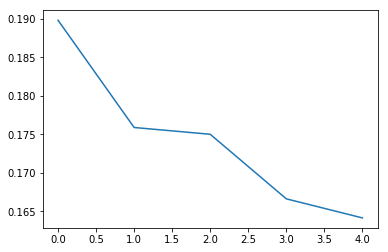

0.18980751342161978


In [53]:
score_knn()

Thu Mar 21 23:01:09 2019 [dogs.__init__] initialized succesfully
Thu Mar 21 23:01:09 2019 [dogs.__init__] initialized succesfully
Thu Mar 21 23:01:10 2019 [dogs.__init__] initialized succesfully
Thu Mar 21 23:01:11 2019 [dogs.__init__] initialized succesfully
Thu Mar 21 23:01:12 2019 [dogs.__init__] initialized succesfully
Thu Mar 21 23:01:13 2019 [dogs.__init__] initialized succesfully
Thu Mar 21 23:01:14 2019 [dogs.__init__] initialized succesfully
Thu Mar 21 23:01:15 2019 [dogs.__init__] initialized succesfully
Thu Mar 21 23:01:16 2019 [dogs.__init__] initialized succesfully
Thu Mar 21 23:01:17 2019 [dogs.__init__] initialized succesfully
Thu Mar 21 23:01:17 2019 [dogs.__init__] initialized succesfully
Thu Mar 21 23:01:18 2019 [dogs.__init__] initialized succesfully
Thu Mar 21 23:01:19 2019 [dogs.__init__] initialized succesfully
Thu Mar 21 23:01:20 2019 [dogs.__init__] initialized succesfully


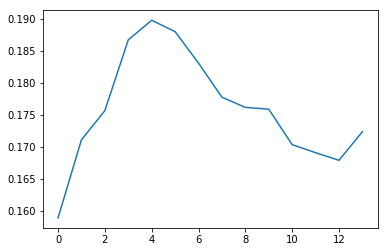

0.18980751342161978


In [55]:
score_knn(space=[5,10,15,20,25,30,35,40,45,50,55,60,65,70])

In [56]:
to_drop = ["Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description","PetID"]

X = train.drop(["AdoptionSpeed"] + to_drop , axis=1)
Y = train['AdoptionSpeed']
X = X.reset_index().drop('index',axis=1)
Y = Y.reset_index().drop('index',axis=1)['AdoptionSpeed']

assert X.shape[0] == Y.shape[0]

Thu Mar 21 23:02:19 2019 [dogs.__init__] initialized succesfully
Thu Mar 21 23:02:21 2019 [dogs.__init__] initialized succesfully
Thu Mar 21 23:02:23 2019 [dogs.__init__] initialized succesfully
Thu Mar 21 23:02:26 2019 [dogs.__init__] initialized succesfully
Thu Mar 21 23:02:29 2019 [dogs.__init__] initialized succesfully


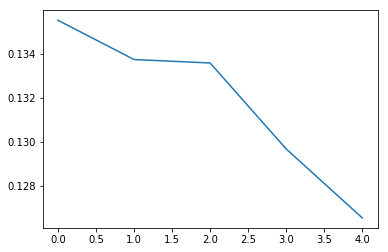

0.13551225985472182


In [58]:
score_knn()

In [60]:
_X=X

In [61]:
X=X.drop(['Color1','Color2','Color3'],axis=1)

Thu Mar 21 23:03:13 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:03:15 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:03:17 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:03:20 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:03:22 2019 [score_knn.__init__] initialized succesfully


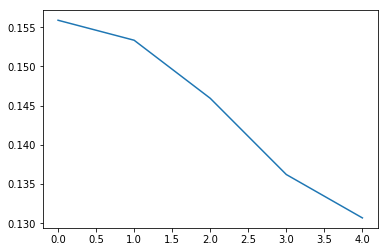

0.1558832301044738


In [62]:
score_knn()

In [65]:
to_drop = ["Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description","PetID"]

X = cats.drop(["AdoptionSpeed"] + to_drop , axis=1)
Y = cats['AdoptionSpeed']
X = X.reset_index().drop('index',axis=1)
Y = Y.reset_index().drop('index',axis=1)['AdoptionSpeed']

assert X.shape[0] == Y.shape[0]

Thu Mar 21 23:04:25 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:04:25 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:04:26 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:04:27 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:04:28 2019 [score_knn.__init__] initialized succesfully


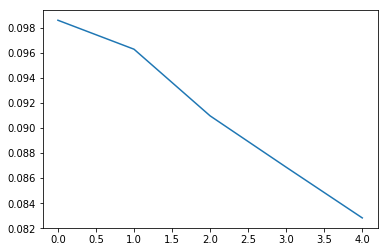

0.09859851904330544


In [66]:
score_knn()

In [67]:
X=X.drop(['Color1','Color2','Color3'],axis=1)

Thu Mar 21 23:04:45 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:04:46 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:04:47 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:04:48 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:04:49 2019 [score_knn.__init__] initialized succesfully


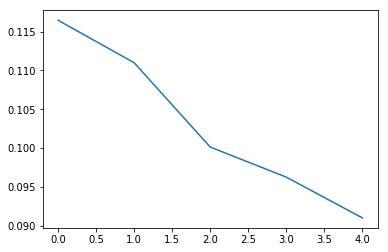

0.11645111240200276


In [68]:
score_knn()

<h2>If I drop colors, it increases by 0.03 consistently</h2>

In [75]:
def reset(f=train):
    to_drop = ["Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description","PetID"]

    X = f.drop(["AdoptionSpeed"] + to_drop , axis=1)
    Y = f['AdoptionSpeed']
    X = X.reset_index().drop('index',axis=1)
    Y = Y.reset_index().drop('index',axis=1)['AdoptionSpeed']

    assert X.shape[0] == Y.shape[0]
    return X,Y

In [86]:
X,Y =reset()

Thu Mar 21 23:10:08 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:10:09 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:10:12 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:10:14 2019 [score_knn.__init__] initialized succesfully


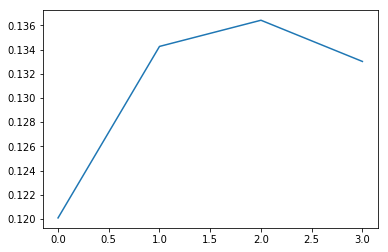

0.13642268563710544


In [87]:
score_knn(space=[5,20,40,80])

In [89]:
X=X.drop(['Color1'],axis=1)

Thu Mar 21 23:11:39 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:11:41 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:11:43 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:11:45 2019 [score_knn.__init__] initialized succesfully


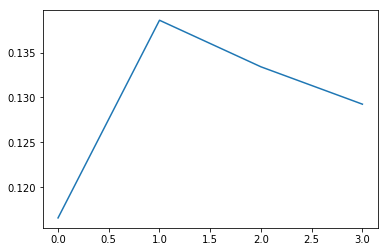

0.13859286411744587


In [92]:
score_knn(space=[5,40,80,150])

In [93]:
X,Y =reset()

Thu Mar 21 23:12:00 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:12:02 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:12:05 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:12:07 2019 [score_knn.__init__] initialized succesfully


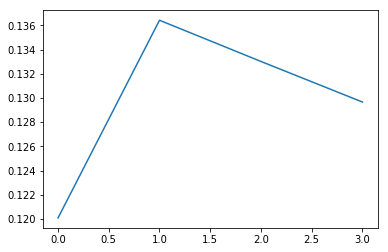

0.13642268563710544


In [94]:
score_knn(space=[5,40,80,150])

In [95]:
X=X.drop(['Color2'],axis=1)

Thu Mar 21 23:15:22 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:15:24 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:15:26 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:15:28 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:15:31 2019 [score_knn.__init__] initialized succesfully


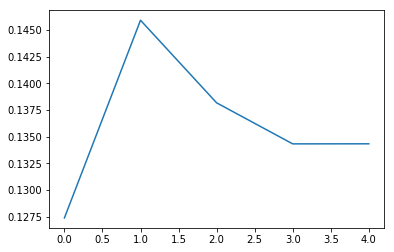

0.1458973712206221


In [97]:
score_knn(space=[5,40,80,100,150])

In [98]:
X,Y =reset()

In [99]:
X=X.drop(['Color3'],axis=1)

Thu Mar 21 23:15:56 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:15:58 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:16:00 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:16:03 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:16:05 2019 [score_knn.__init__] initialized succesfully


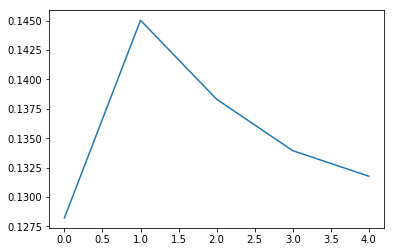

0.14503779058128186


In [100]:
score_knn(space=[5,40,80,100,150])

In [103]:
def score_knn(space=[3,10,25,50,100,150,200,500],name="score_knn"):
    # X in memory
    from matplotlib import pyplot as plt
    score = []
    for k in space:
        model = PredictiveModel(name, k)
        score.append(model.validation(X, Y, method=2, verbose=False))
    plt.plot(space, score)
    plt.show()
    print(max(score))

Thu Mar 21 23:20:03 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:20:05 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:20:06 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:20:08 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:20:11 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:20:13 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:20:17 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:20:20 2019 [score_knn.__init__] initialized succesfully


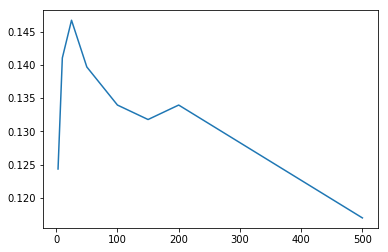

0.14669723578173036


In [104]:
score_knn()

In [105]:
X,Y =reset()

In [106]:
X=X.drop(['Color3','Color2'],axis=1)

turns out that the scores improves if I drop non relevant data

Thu Mar 21 23:21:05 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:21:07 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:21:09 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:21:12 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:21:14 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:21:16 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:21:19 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:21:23 2019 [score_knn.__init__] initialized succesfully


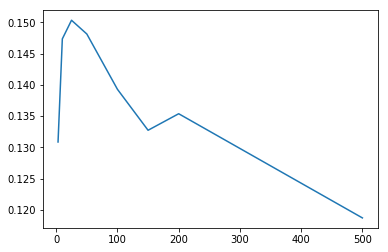

0.15034037896293234


In [107]:
score_knn()

lets try to drop feats 1 by 1 and check how it changes

In [109]:
X,Y =reset()

In [110]:
X.columns

Index(['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'VideoAmt',
       'PhotoAmt'],
      dtype='object')

Thu Mar 21 23:26:00 2019 [Type.__init__] initialized succesfully
Thu Mar 21 23:26:02 2019 [Type.__init__] initialized succesfully
Thu Mar 21 23:26:04 2019 [Type.__init__] initialized succesfully
Thu Mar 21 23:26:06 2019 [Type.__init__] initialized succesfully
Thu Mar 21 23:26:09 2019 [Type.__init__] initialized succesfully
Thu Mar 21 23:26:11 2019 [Type.__init__] initialized succesfully
Thu Mar 21 23:26:15 2019 [Type.__init__] initialized succesfully
Thu Mar 21 23:26:18 2019 [Type.__init__] initialized succesfully


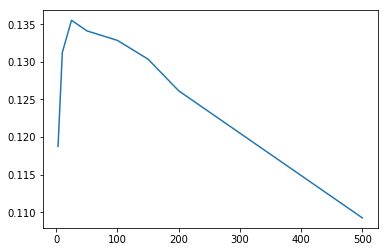

0.13552583747792768
Thu Mar 21 23:26:23 2019 [Age.__init__] initialized succesfully
Thu Mar 21 23:26:25 2019 [Age.__init__] initialized succesfully
Thu Mar 21 23:26:27 2019 [Age.__init__] initialized succesfully
Thu Mar 21 23:26:29 2019 [Age.__init__] initialized succesfully
Thu Mar 21 23:26:32 2019 [Age.__init__] initialized succesfully
Thu Mar 21 23:26:34 2019 [Age.__init__] initialized succesfully
Thu Mar 21 23:26:37 2019 [Age.__init__] initialized succesfully
Thu Mar 21 23:26:41 2019 [Age.__init__] initialized succesfully


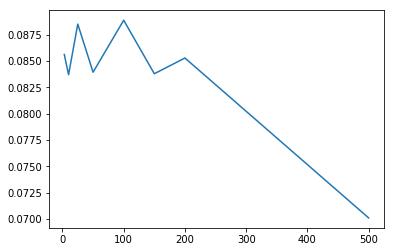

0.08886585409737582
Thu Mar 21 23:26:46 2019 [Breed1.__init__] initialized succesfully
Thu Mar 21 23:26:49 2019 [Breed1.__init__] initialized succesfully
Thu Mar 21 23:26:51 2019 [Breed1.__init__] initialized succesfully
Thu Mar 21 23:26:53 2019 [Breed1.__init__] initialized succesfully
Thu Mar 21 23:26:56 2019 [Breed1.__init__] initialized succesfully
Thu Mar 21 23:26:58 2019 [Breed1.__init__] initialized succesfully
Thu Mar 21 23:27:02 2019 [Breed1.__init__] initialized succesfully
Thu Mar 21 23:27:06 2019 [Breed1.__init__] initialized succesfully


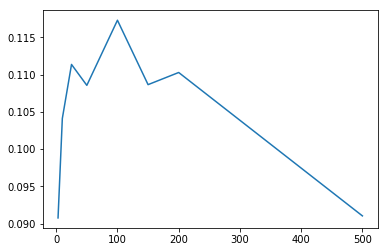

0.1173150704548748
Thu Mar 21 23:27:12 2019 [Breed2.__init__] initialized succesfully
Thu Mar 21 23:27:14 2019 [Breed2.__init__] initialized succesfully
Thu Mar 21 23:27:16 2019 [Breed2.__init__] initialized succesfully
Thu Mar 21 23:27:18 2019 [Breed2.__init__] initialized succesfully
Thu Mar 21 23:27:20 2019 [Breed2.__init__] initialized succesfully
Thu Mar 21 23:27:23 2019 [Breed2.__init__] initialized succesfully
Thu Mar 21 23:27:26 2019 [Breed2.__init__] initialized succesfully
Thu Mar 21 23:27:29 2019 [Breed2.__init__] initialized succesfully


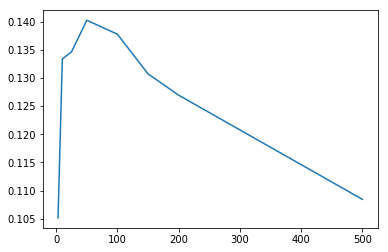

0.14023405168508946
Thu Mar 21 23:27:35 2019 [Gender.__init__] initialized succesfully
Thu Mar 21 23:27:37 2019 [Gender.__init__] initialized succesfully
Thu Mar 21 23:27:39 2019 [Gender.__init__] initialized succesfully
Thu Mar 21 23:27:41 2019 [Gender.__init__] initialized succesfully
Thu Mar 21 23:27:44 2019 [Gender.__init__] initialized succesfully
Thu Mar 21 23:27:46 2019 [Gender.__init__] initialized succesfully
Thu Mar 21 23:27:49 2019 [Gender.__init__] initialized succesfully
Thu Mar 21 23:27:52 2019 [Gender.__init__] initialized succesfully


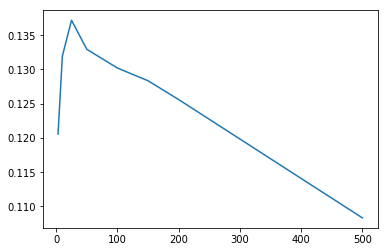

0.1371871403281872
Thu Mar 21 23:27:57 2019 [Color1.__init__] initialized succesfully
Thu Mar 21 23:27:59 2019 [Color1.__init__] initialized succesfully
Thu Mar 21 23:28:01 2019 [Color1.__init__] initialized succesfully
Thu Mar 21 23:28:03 2019 [Color1.__init__] initialized succesfully
Thu Mar 21 23:28:05 2019 [Color1.__init__] initialized succesfully
Thu Mar 21 23:28:08 2019 [Color1.__init__] initialized succesfully
Thu Mar 21 23:28:12 2019 [Color1.__init__] initialized succesfully
Thu Mar 21 23:28:15 2019 [Color1.__init__] initialized succesfully


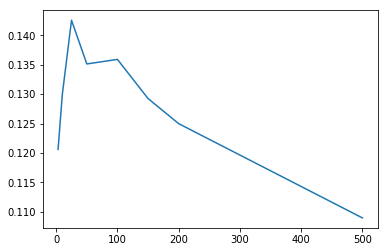

0.1425747793210316
Thu Mar 21 23:28:21 2019 [Color2.__init__] initialized succesfully
Thu Mar 21 23:28:23 2019 [Color2.__init__] initialized succesfully
Thu Mar 21 23:28:25 2019 [Color2.__init__] initialized succesfully
Thu Mar 21 23:28:27 2019 [Color2.__init__] initialized succesfully
Thu Mar 21 23:28:30 2019 [Color2.__init__] initialized succesfully
Thu Mar 21 23:28:33 2019 [Color2.__init__] initialized succesfully
Thu Mar 21 23:28:36 2019 [Color2.__init__] initialized succesfully
Thu Mar 21 23:28:39 2019 [Color2.__init__] initialized succesfully


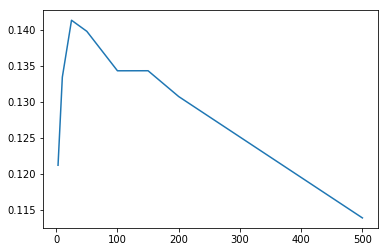

0.14134948227375482
Thu Mar 21 23:28:44 2019 [Color3.__init__] initialized succesfully
Thu Mar 21 23:28:46 2019 [Color3.__init__] initialized succesfully
Thu Mar 21 23:28:48 2019 [Color3.__init__] initialized succesfully
Thu Mar 21 23:28:50 2019 [Color3.__init__] initialized succesfully
Thu Mar 21 23:28:53 2019 [Color3.__init__] initialized succesfully
Thu Mar 21 23:28:56 2019 [Color3.__init__] initialized succesfully
Thu Mar 21 23:28:59 2019 [Color3.__init__] initialized succesfully
Thu Mar 21 23:29:02 2019 [Color3.__init__] initialized succesfully


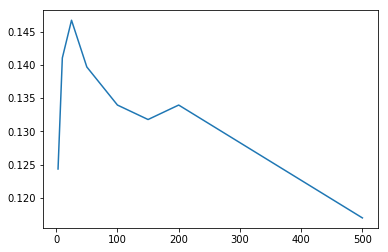

0.14669723578173036
Thu Mar 21 23:29:07 2019 [MaturitySize.__init__] initialized succesfully
Thu Mar 21 23:29:09 2019 [MaturitySize.__init__] initialized succesfully
Thu Mar 21 23:29:12 2019 [MaturitySize.__init__] initialized succesfully
Thu Mar 21 23:29:14 2019 [MaturitySize.__init__] initialized succesfully
Thu Mar 21 23:29:17 2019 [MaturitySize.__init__] initialized succesfully
Thu Mar 21 23:29:20 2019 [MaturitySize.__init__] initialized succesfully
Thu Mar 21 23:29:24 2019 [MaturitySize.__init__] initialized succesfully
Thu Mar 21 23:29:27 2019 [MaturitySize.__init__] initialized succesfully


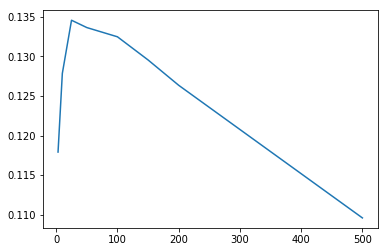

0.13455266091044454
Thu Mar 21 23:29:32 2019 [FurLength.__init__] initialized succesfully
Thu Mar 21 23:29:34 2019 [FurLength.__init__] initialized succesfully
Thu Mar 21 23:29:36 2019 [FurLength.__init__] initialized succesfully
Thu Mar 21 23:29:39 2019 [FurLength.__init__] initialized succesfully
Thu Mar 21 23:29:41 2019 [FurLength.__init__] initialized succesfully
Thu Mar 21 23:29:44 2019 [FurLength.__init__] initialized succesfully
Thu Mar 21 23:29:47 2019 [FurLength.__init__] initialized succesfully
Thu Mar 21 23:29:51 2019 [FurLength.__init__] initialized succesfully


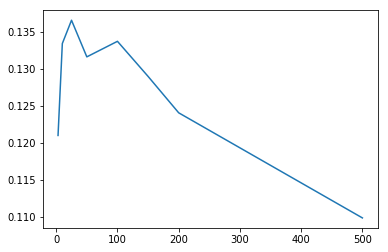

0.1366058080065973
Thu Mar 21 23:29:56 2019 [Vaccinated.__init__] initialized succesfully
Thu Mar 21 23:29:59 2019 [Vaccinated.__init__] initialized succesfully
Thu Mar 21 23:30:01 2019 [Vaccinated.__init__] initialized succesfully
Thu Mar 21 23:30:03 2019 [Vaccinated.__init__] initialized succesfully
Thu Mar 21 23:30:06 2019 [Vaccinated.__init__] initialized succesfully
Thu Mar 21 23:30:08 2019 [Vaccinated.__init__] initialized succesfully
Thu Mar 21 23:30:12 2019 [Vaccinated.__init__] initialized succesfully
Thu Mar 21 23:30:15 2019 [Vaccinated.__init__] initialized succesfully


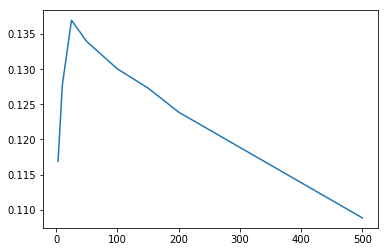

0.1369766759954666
Thu Mar 21 23:30:21 2019 [Dewormed.__init__] initialized succesfully
Thu Mar 21 23:30:23 2019 [Dewormed.__init__] initialized succesfully
Thu Mar 21 23:30:25 2019 [Dewormed.__init__] initialized succesfully
Thu Mar 21 23:30:27 2019 [Dewormed.__init__] initialized succesfully
Thu Mar 21 23:30:29 2019 [Dewormed.__init__] initialized succesfully
Thu Mar 21 23:30:32 2019 [Dewormed.__init__] initialized succesfully
Thu Mar 21 23:30:35 2019 [Dewormed.__init__] initialized succesfully
Thu Mar 21 23:30:38 2019 [Dewormed.__init__] initialized succesfully


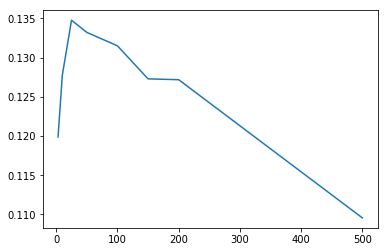

0.1347546047614675
Thu Mar 21 23:30:43 2019 [Sterilized.__init__] initialized succesfully
Thu Mar 21 23:30:45 2019 [Sterilized.__init__] initialized succesfully
Thu Mar 21 23:30:47 2019 [Sterilized.__init__] initialized succesfully
Thu Mar 21 23:30:49 2019 [Sterilized.__init__] initialized succesfully
Thu Mar 21 23:30:51 2019 [Sterilized.__init__] initialized succesfully
Thu Mar 21 23:30:54 2019 [Sterilized.__init__] initialized succesfully
Thu Mar 21 23:30:57 2019 [Sterilized.__init__] initialized succesfully
Thu Mar 21 23:31:01 2019 [Sterilized.__init__] initialized succesfully


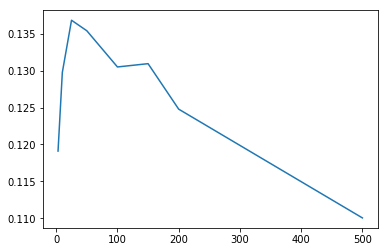

0.13682416987194457
Thu Mar 21 23:31:06 2019 [Health.__init__] initialized succesfully
Thu Mar 21 23:31:08 2019 [Health.__init__] initialized succesfully
Thu Mar 21 23:31:10 2019 [Health.__init__] initialized succesfully
Thu Mar 21 23:31:12 2019 [Health.__init__] initialized succesfully
Thu Mar 21 23:31:14 2019 [Health.__init__] initialized succesfully
Thu Mar 21 23:31:17 2019 [Health.__init__] initialized succesfully
Thu Mar 21 23:31:21 2019 [Health.__init__] initialized succesfully
Thu Mar 21 23:31:25 2019 [Health.__init__] initialized succesfully


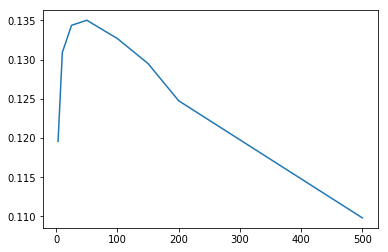

0.13502394235337753
Thu Mar 21 23:31:30 2019 [Quantity.__init__] initialized succesfully
Thu Mar 21 23:31:32 2019 [Quantity.__init__] initialized succesfully
Thu Mar 21 23:31:35 2019 [Quantity.__init__] initialized succesfully
Thu Mar 21 23:31:38 2019 [Quantity.__init__] initialized succesfully
Thu Mar 21 23:31:41 2019 [Quantity.__init__] initialized succesfully
Thu Mar 21 23:31:43 2019 [Quantity.__init__] initialized succesfully
Thu Mar 21 23:31:47 2019 [Quantity.__init__] initialized succesfully
Thu Mar 21 23:31:51 2019 [Quantity.__init__] initialized succesfully


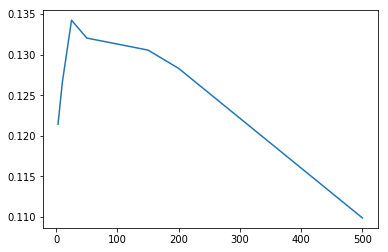

0.13422878442188785
Thu Mar 21 23:31:57 2019 [Fee.__init__] initialized succesfully
Thu Mar 21 23:31:58 2019 [Fee.__init__] initialized succesfully
Thu Mar 21 23:32:00 2019 [Fee.__init__] initialized succesfully
Thu Mar 21 23:32:02 2019 [Fee.__init__] initialized succesfully
Thu Mar 21 23:32:04 2019 [Fee.__init__] initialized succesfully
Thu Mar 21 23:32:07 2019 [Fee.__init__] initialized succesfully
Thu Mar 21 23:32:10 2019 [Fee.__init__] initialized succesfully
Thu Mar 21 23:32:12 2019 [Fee.__init__] initialized succesfully


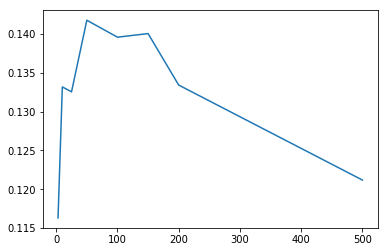

0.14176072989478983
Thu Mar 21 23:32:18 2019 [State.__init__] initialized succesfully
Thu Mar 21 23:32:20 2019 [State.__init__] initialized succesfully
Thu Mar 21 23:32:22 2019 [State.__init__] initialized succesfully
Thu Mar 21 23:32:24 2019 [State.__init__] initialized succesfully
Thu Mar 21 23:32:26 2019 [State.__init__] initialized succesfully
Thu Mar 21 23:32:29 2019 [State.__init__] initialized succesfully
Thu Mar 21 23:32:32 2019 [State.__init__] initialized succesfully
Thu Mar 21 23:32:35 2019 [State.__init__] initialized succesfully


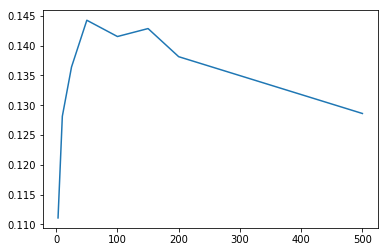

0.1442383846160889
Thu Mar 21 23:32:40 2019 [VideoAmt.__init__] initialized succesfully
Thu Mar 21 23:32:42 2019 [VideoAmt.__init__] initialized succesfully
Thu Mar 21 23:32:45 2019 [VideoAmt.__init__] initialized succesfully
Thu Mar 21 23:32:47 2019 [VideoAmt.__init__] initialized succesfully
Thu Mar 21 23:32:50 2019 [VideoAmt.__init__] initialized succesfully
Thu Mar 21 23:32:52 2019 [VideoAmt.__init__] initialized succesfully
Thu Mar 21 23:32:55 2019 [VideoAmt.__init__] initialized succesfully
Thu Mar 21 23:32:59 2019 [VideoAmt.__init__] initialized succesfully


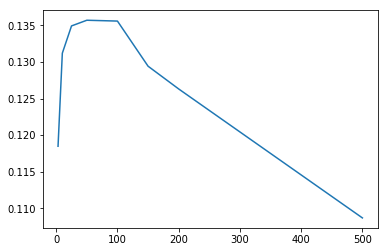

0.13569578763199813
Thu Mar 21 23:33:05 2019 [PhotoAmt.__init__] initialized succesfully
Thu Mar 21 23:33:07 2019 [PhotoAmt.__init__] initialized succesfully
Thu Mar 21 23:33:09 2019 [PhotoAmt.__init__] initialized succesfully
Thu Mar 21 23:33:11 2019 [PhotoAmt.__init__] initialized succesfully
Thu Mar 21 23:33:14 2019 [PhotoAmt.__init__] initialized succesfully
Thu Mar 21 23:33:17 2019 [PhotoAmt.__init__] initialized succesfully
Thu Mar 21 23:33:20 2019 [PhotoAmt.__init__] initialized succesfully
Thu Mar 21 23:33:24 2019 [PhotoAmt.__init__] initialized succesfully


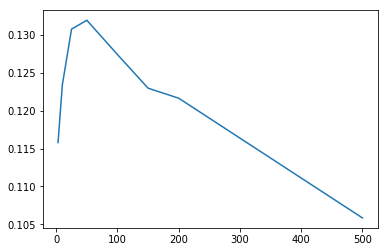

0.1319408965284863


In [111]:
cols = X.columns
for col in cols:
    X,Y = reset()
    X=X.drop(col,axis=1)
    score_knn(name=col)

In [112]:
#baseline 0.1364

#missing feat : score

#Type: 0.13
#age: 0.088
#Breed: 0.11
#Breed2: 0.14
#Gender: 0.13
#Color1: 0.14257
#Color2: 0.14134
#Color2:0.14669
#MaturitySize: 0.1345
#FurLength: 0.1366
#Vaccinated: 0.136976
#Dewormed: 0.13475
#Sterlized:0.136824
#Health:0.13502
#Quantity:0.13422
#Fee:0.1417
#State:0.14423
#VideoAmt:0.13569
#PhotoAmt:0.131940

hyp: the less important a feat the more problems it bring.

from trees/catboost/feature_importance.png

non important feats in catboost: Color3, Color2, Color1, Dewormed, Vaccinated, Type, VideoAmt, Health, Furlength, MaturitySize

In [113]:
X,Y=reset()

In [115]:
X=X.drop(['Color2','Color2','Breed2'],axis=1)

Thu Mar 21 23:39:28 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:39:30 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:39:32 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:39:34 2019 [score_knn.__init__] initialized succesfully


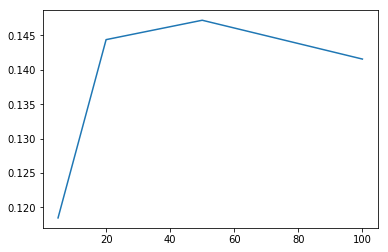

0.1471855925954963


In [117]:
score_knn(space=[5,20,50,100])

In [118]:
X,Y=reset()

In [119]:
X=X.drop(['Color2','Color3'],axis=1)

Thu Mar 21 23:39:58 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:40:00 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:40:02 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:40:04 2019 [score_knn.__init__] initialized succesfully


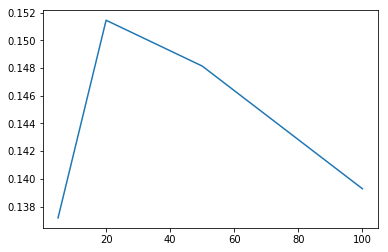

0.1514431245781561


In [120]:
score_knn(space=[5,20,50,100])

In [121]:
X,Y=reset()

In [122]:
X=X.drop(['Color2','Color3','Breed2'],axis=1)

Thu Mar 21 23:40:17 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:40:19 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:40:20 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:40:22 2019 [score_knn.__init__] initialized succesfully


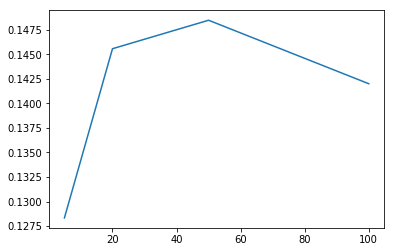

0.14847880535471034


In [123]:
score_knn(space=[5,20,50,100])

In [127]:
X,Y=reset()

In [128]:
X=X.drop(['Color2','Color3','State'],axis=1)

Thu Mar 21 23:41:26 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:41:28 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:41:30 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:41:32 2019 [score_knn.__init__] initialized succesfully


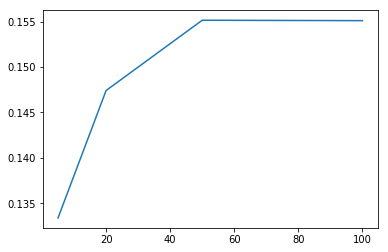

0.15513976099639887


In [129]:
score_knn(space=[5,20,50,100])

In [130]:
X,Y=reset()

In [131]:
X=X.drop(['Color2','Color3','Fee'],axis=1)

Thu Mar 21 23:42:54 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:42:55 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:42:57 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:42:58 2019 [score_knn.__init__] initialized succesfully


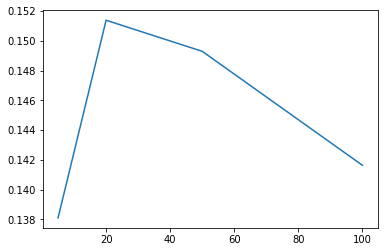

0.15137726459871764


In [132]:
score_knn(space=[5,20,50,100])

In [139]:
X,Y=reset()

In [140]:
X=X.drop(['Color2','Color3','State','Fee'],axis=1)

Thu Mar 21 23:44:46 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:44:47 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:44:48 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:44:50 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:44:52 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:44:54 2019 [score_knn.__init__] initialized succesfully


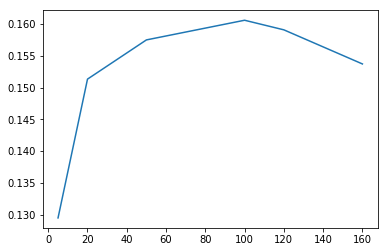

0.16059858690900866


In [142]:
score_knn(space=[5,20,50,100,120,160])

In [143]:
X,Y=reset()

In [144]:
X=X.drop(['Color1','Color2','Color3','State','Fee'],axis=1)

Thu Mar 21 23:45:06 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:45:08 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:45:09 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:45:10 2019 [score_knn.__init__] initialized succesfully


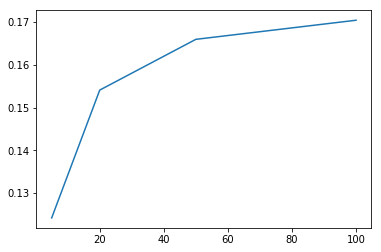

0.1704300115927759


In [145]:
score_knn(space=[5,20,50,100])

In [148]:
X,Y=reset(f=dogs)

In [149]:
X=X.drop(['Color1','Color2','Color3','State','Fee'],axis=1)

Thu Mar 21 23:47:24 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:47:25 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:47:25 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:47:26 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:47:27 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:47:27 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:47:28 2019 [score_knn.__init__] initialized succesfully
Thu Mar 21 23:47:29 2019 [score_knn.__init__] initialized succesfully


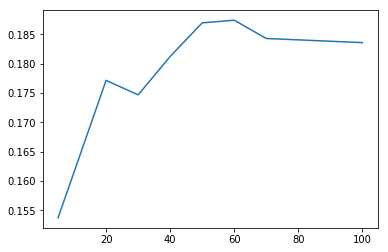

0.18738655494058018


In [151]:
score_knn(space=[5,20,30,40,50,60,70,100])

In [157]:
states

,Unnamed: 0,StateID,StateName
0,0,41336,Johor
1,1,41325,Kedah
2,2,41367,Kelantan
3,3,41401,Kuala Lumpur
4,4,41415,Labuan
5,5,41324,Melaka
6,6,41332,Negeri Sembilan
7,7,41335,Pahang
8,8,41330,Perak
9,9,41380,Perlis


In [160]:
s="""1.4854° N, 103.7618° E
6.1184° N, 100.3685° E
6.1254° N, 102.2381° E
3.1390° N, 101.6869° E
5.2831° N, 115.2308° E
2.1896° N, 102.2501° E
2.7258° N, 101.9424° E
3.8126° N, 103.3256° E
4.5921° N, 101.0901° E
6.4449° N, 100.2048° E
5.4356° N, 100.3091° E
5.9788° N, 116.0753° E
1.5533° N, 110.3592° E
3.0738° N, 101.5183° E
5.3117° N, 103.1324° E"""

In [171]:
coos=[*map(lambda t: (t.split(', ')[0][:-3],t.split(', ')[1][:-3]), s.split('\n'))]

In [172]:
ids=list(states['StateID'])

In [195]:
state_N_mapping={idd:coos[i][0] for i,idd in enumerate(ids)}

In [197]:
state_E_mapping={idd:coos[i][1] for i,idd in enumerate(ids)}

In [188]:
states['N'] = list([*zip(*coos)][0])
states['E'] = list([*zip(*coos)][1])

<h1>mapped states</h1>

In [191]:
states

,Unnamed: 0,StateID,StateName,N,E
0,0,41336,Johor,1.4854,103.7618
1,1,41325,Kedah,6.1184,100.3685
2,2,41367,Kelantan,6.1254,102.2381
3,3,41401,Kuala Lumpur,3.1390,101.6869
4,4,41415,Labuan,5.2831,115.2308
5,5,41324,Melaka,2.1896,102.2501
6,6,41332,Negeri Sembilan,2.7258,101.9424
7,7,41335,Pahang,3.8126,103.3256
8,8,41330,Perak,4.5921,101.0901
9,9,41380,Perlis,6.4449,100.2048


In [279]:
X,Y=reset()

In [280]:
X['State_N'] = X['State'].map(state_N_mapping)

In [281]:
X['State_E'] = X['State'].map(state_E_mapping)

In [202]:
X,Y=reset()

Fri Mar 22 00:34:31 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:34:33 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:34:35 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:34:38 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:34:40 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:34:43 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:34:46 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:34:49 2019 [score_knn.__init__] initialized succesfully


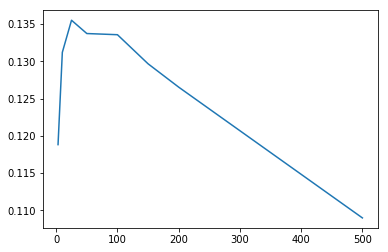

0.13551225985472182


In [203]:
score_knn()

In [280]:
X['State_N'] = X['State'].map(state_N_mapping)

In [281]:
X['State_E'] = X['State'].map(state_E_mapping)

In [205]:
X['State_N'] = X['State'].map(state_N_mapping)
X['State_E'] = X['State'].map(state_E_mapping)
X=X.drop('State',axis=1)

Fri Mar 22 00:35:43 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:35:45 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:35:47 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:35:49 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:35:51 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:35:54 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:35:57 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:36:00 2019 [score_knn.__init__] initialized succesfully


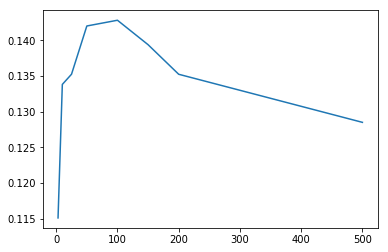

0.14282925655506246


In [207]:
score_knn()

In [208]:
X,Y=reset()

In [210]:
X=X.drop('State',axis=1)

Fri Mar 22 00:37:32 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:37:34 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:37:36 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:37:38 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:37:41 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:37:43 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:37:46 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:37:49 2019 [score_knn.__init__] initialized succesfully


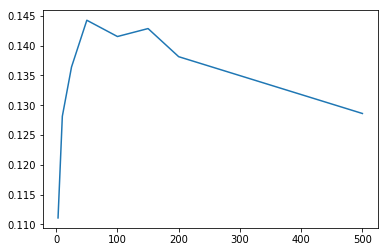

0.1442383846160889


In [211]:
score_knn()

In [215]:
X,Y=reset(f=dogs)

In [216]:
scaled = pd.DataFrame()
for col in X:
    df = X[col]
    scaled[col] = (df - df.mean()) / (df.max() - df.min())

In [220]:
X=scaled

Fri Mar 22 00:43:26 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:43:27 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:43:28 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:43:30 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:43:31 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:43:33 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:43:35 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:43:38 2019 [score_knn.__init__] initialized succesfully


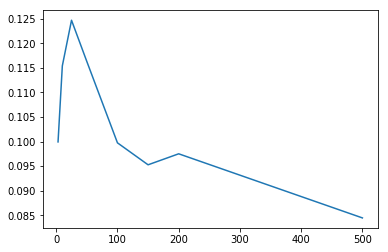

0.12472502511973801


In [221]:
score_knn()

In [225]:
X,Y=reset(f=dogs)
X.columns

Index(['Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3',
       'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized',
       'Health', 'Quantity', 'Fee', 'State', 'VideoAmt', 'PhotoAmt'],
      dtype='object')

Fri Mar 22 00:46:47 2019 [Age.__init__] initialized succesfully
Fri Mar 22 00:46:48 2019 [Age.__init__] initialized succesfully
Fri Mar 22 00:46:50 2019 [Age.__init__] initialized succesfully
Fri Mar 22 00:46:51 2019 [Age.__init__] initialized succesfully
Fri Mar 22 00:46:53 2019 [Age.__init__] initialized succesfully
Fri Mar 22 00:46:54 2019 [Age.__init__] initialized succesfully
Fri Mar 22 00:46:56 2019 [Age.__init__] initialized succesfully
Fri Mar 22 00:46:59 2019 [Age.__init__] initialized succesfully


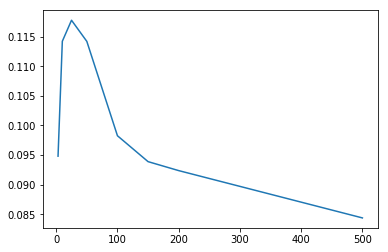

0.11776059120682583
Fri Mar 22 00:47:02 2019 [Breed1.__init__] initialized succesfully
Fri Mar 22 00:47:03 2019 [Breed1.__init__] initialized succesfully
Fri Mar 22 00:47:04 2019 [Breed1.__init__] initialized succesfully
Fri Mar 22 00:47:05 2019 [Breed1.__init__] initialized succesfully
Fri Mar 22 00:47:06 2019 [Breed1.__init__] initialized succesfully
Fri Mar 22 00:47:08 2019 [Breed1.__init__] initialized succesfully
Fri Mar 22 00:47:10 2019 [Breed1.__init__] initialized succesfully
Fri Mar 22 00:47:12 2019 [Breed1.__init__] initialized succesfully


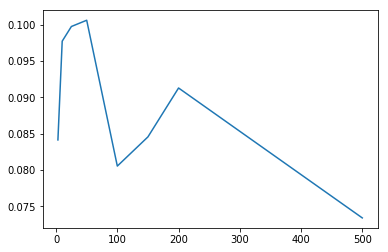

0.10061731258883619
Fri Mar 22 00:47:16 2019 [Breed2.__init__] initialized succesfully
Fri Mar 22 00:47:17 2019 [Breed2.__init__] initialized succesfully
Fri Mar 22 00:47:18 2019 [Breed2.__init__] initialized succesfully
Fri Mar 22 00:47:19 2019 [Breed2.__init__] initialized succesfully
Fri Mar 22 00:47:21 2019 [Breed2.__init__] initialized succesfully
Fri Mar 22 00:47:23 2019 [Breed2.__init__] initialized succesfully
Fri Mar 22 00:47:25 2019 [Breed2.__init__] initialized succesfully
Fri Mar 22 00:47:27 2019 [Breed2.__init__] initialized succesfully


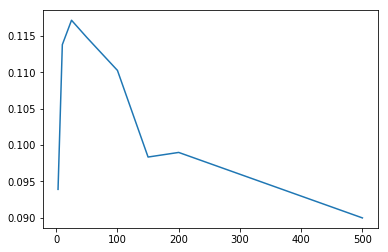

0.11717084980803608
Fri Mar 22 00:47:30 2019 [Gender.__init__] initialized succesfully
Fri Mar 22 00:47:31 2019 [Gender.__init__] initialized succesfully
Fri Mar 22 00:47:32 2019 [Gender.__init__] initialized succesfully
Fri Mar 22 00:47:34 2019 [Gender.__init__] initialized succesfully
Fri Mar 22 00:47:35 2019 [Gender.__init__] initialized succesfully
Fri Mar 22 00:47:37 2019 [Gender.__init__] initialized succesfully
Fri Mar 22 00:47:39 2019 [Gender.__init__] initialized succesfully
Fri Mar 22 00:47:41 2019 [Gender.__init__] initialized succesfully


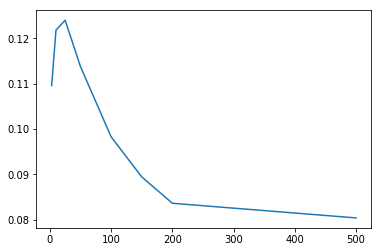

0.12397519952914586
Fri Mar 22 00:47:44 2019 [Color1.__init__] initialized succesfully
Fri Mar 22 00:47:45 2019 [Color1.__init__] initialized succesfully
Fri Mar 22 00:47:47 2019 [Color1.__init__] initialized succesfully
Fri Mar 22 00:47:48 2019 [Color1.__init__] initialized succesfully
Fri Mar 22 00:47:50 2019 [Color1.__init__] initialized succesfully
Fri Mar 22 00:47:52 2019 [Color1.__init__] initialized succesfully
Fri Mar 22 00:47:54 2019 [Color1.__init__] initialized succesfully
Fri Mar 22 00:47:56 2019 [Color1.__init__] initialized succesfully


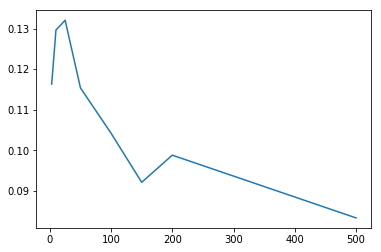

0.1320427640777378
Fri Mar 22 00:48:00 2019 [Color2.__init__] initialized succesfully
Fri Mar 22 00:48:01 2019 [Color2.__init__] initialized succesfully
Fri Mar 22 00:48:03 2019 [Color2.__init__] initialized succesfully
Fri Mar 22 00:48:05 2019 [Color2.__init__] initialized succesfully
Fri Mar 22 00:48:07 2019 [Color2.__init__] initialized succesfully
Fri Mar 22 00:48:09 2019 [Color2.__init__] initialized succesfully
Fri Mar 22 00:48:11 2019 [Color2.__init__] initialized succesfully
Fri Mar 22 00:48:13 2019 [Color2.__init__] initialized succesfully


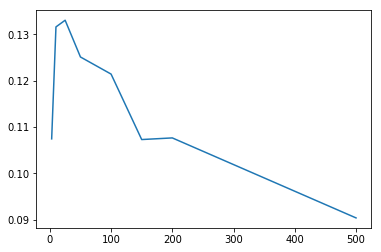

0.13305756358142634
Fri Mar 22 00:48:17 2019 [Color3.__init__] initialized succesfully
Fri Mar 22 00:48:18 2019 [Color3.__init__] initialized succesfully
Fri Mar 22 00:48:19 2019 [Color3.__init__] initialized succesfully
Fri Mar 22 00:48:20 2019 [Color3.__init__] initialized succesfully
Fri Mar 22 00:48:22 2019 [Color3.__init__] initialized succesfully
Fri Mar 22 00:48:23 2019 [Color3.__init__] initialized succesfully
Fri Mar 22 00:48:25 2019 [Color3.__init__] initialized succesfully
Fri Mar 22 00:48:28 2019 [Color3.__init__] initialized succesfully


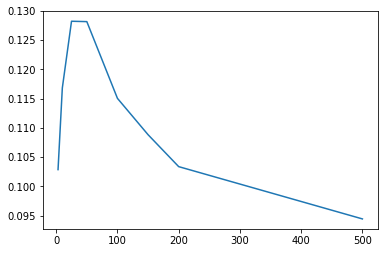

0.1282328714389985
Fri Mar 22 00:48:31 2019 [MaturitySize.__init__] initialized succesfully
Fri Mar 22 00:48:32 2019 [MaturitySize.__init__] initialized succesfully
Fri Mar 22 00:48:33 2019 [MaturitySize.__init__] initialized succesfully
Fri Mar 22 00:48:34 2019 [MaturitySize.__init__] initialized succesfully
Fri Mar 22 00:48:36 2019 [MaturitySize.__init__] initialized succesfully
Fri Mar 22 00:48:38 2019 [MaturitySize.__init__] initialized succesfully
Fri Mar 22 00:48:40 2019 [MaturitySize.__init__] initialized succesfully
Fri Mar 22 00:48:42 2019 [MaturitySize.__init__] initialized succesfully


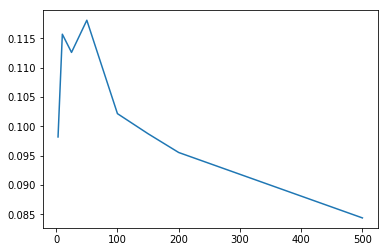

0.11810476893347395
Fri Mar 22 00:48:46 2019 [FurLength.__init__] initialized succesfully
Fri Mar 22 00:48:46 2019 [FurLength.__init__] initialized succesfully
Fri Mar 22 00:48:48 2019 [FurLength.__init__] initialized succesfully
Fri Mar 22 00:48:49 2019 [FurLength.__init__] initialized succesfully
Fri Mar 22 00:48:50 2019 [FurLength.__init__] initialized succesfully
Fri Mar 22 00:48:52 2019 [FurLength.__init__] initialized succesfully
Fri Mar 22 00:48:54 2019 [FurLength.__init__] initialized succesfully
Fri Mar 22 00:48:56 2019 [FurLength.__init__] initialized succesfully


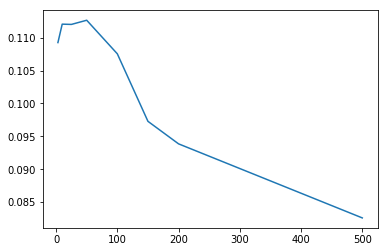

0.11266839734090514
Fri Mar 22 00:48:59 2019 [Vaccinated.__init__] initialized succesfully
Fri Mar 22 00:49:00 2019 [Vaccinated.__init__] initialized succesfully
Fri Mar 22 00:49:02 2019 [Vaccinated.__init__] initialized succesfully
Fri Mar 22 00:49:03 2019 [Vaccinated.__init__] initialized succesfully
Fri Mar 22 00:49:04 2019 [Vaccinated.__init__] initialized succesfully
Fri Mar 22 00:49:06 2019 [Vaccinated.__init__] initialized succesfully
Fri Mar 22 00:49:08 2019 [Vaccinated.__init__] initialized succesfully
Fri Mar 22 00:49:10 2019 [Vaccinated.__init__] initialized succesfully


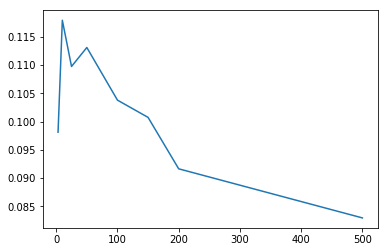

0.11795011243209223
Fri Mar 22 00:49:14 2019 [Dewormed.__init__] initialized succesfully
Fri Mar 22 00:49:15 2019 [Dewormed.__init__] initialized succesfully
Fri Mar 22 00:49:17 2019 [Dewormed.__init__] initialized succesfully
Fri Mar 22 00:49:18 2019 [Dewormed.__init__] initialized succesfully
Fri Mar 22 00:49:20 2019 [Dewormed.__init__] initialized succesfully
Fri Mar 22 00:49:22 2019 [Dewormed.__init__] initialized succesfully
Fri Mar 22 00:49:24 2019 [Dewormed.__init__] initialized succesfully
Fri Mar 22 00:49:26 2019 [Dewormed.__init__] initialized succesfully


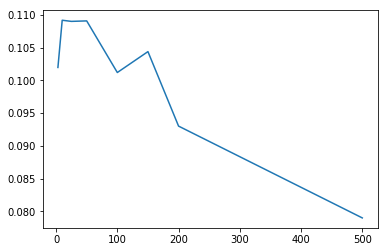

0.10916226701228149
Fri Mar 22 00:49:30 2019 [Sterilized.__init__] initialized succesfully
Fri Mar 22 00:49:31 2019 [Sterilized.__init__] initialized succesfully
Fri Mar 22 00:49:32 2019 [Sterilized.__init__] initialized succesfully
Fri Mar 22 00:49:33 2019 [Sterilized.__init__] initialized succesfully
Fri Mar 22 00:49:35 2019 [Sterilized.__init__] initialized succesfully
Fri Mar 22 00:49:36 2019 [Sterilized.__init__] initialized succesfully
Fri Mar 22 00:49:38 2019 [Sterilized.__init__] initialized succesfully
Fri Mar 22 00:49:41 2019 [Sterilized.__init__] initialized succesfully


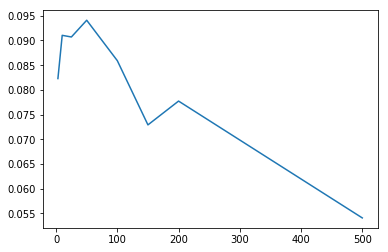

0.09409261915252416
Fri Mar 22 00:49:44 2019 [Health.__init__] initialized succesfully
Fri Mar 22 00:49:45 2019 [Health.__init__] initialized succesfully
Fri Mar 22 00:49:46 2019 [Health.__init__] initialized succesfully
Fri Mar 22 00:49:47 2019 [Health.__init__] initialized succesfully
Fri Mar 22 00:49:49 2019 [Health.__init__] initialized succesfully
Fri Mar 22 00:49:51 2019 [Health.__init__] initialized succesfully
Fri Mar 22 00:49:53 2019 [Health.__init__] initialized succesfully
Fri Mar 22 00:49:55 2019 [Health.__init__] initialized succesfully


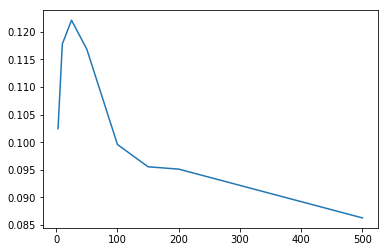

0.12211296308204878
Fri Mar 22 00:49:58 2019 [Quantity.__init__] initialized succesfully
Fri Mar 22 00:49:59 2019 [Quantity.__init__] initialized succesfully
Fri Mar 22 00:50:01 2019 [Quantity.__init__] initialized succesfully
Fri Mar 22 00:50:02 2019 [Quantity.__init__] initialized succesfully
Fri Mar 22 00:50:03 2019 [Quantity.__init__] initialized succesfully
Fri Mar 22 00:50:06 2019 [Quantity.__init__] initialized succesfully
Fri Mar 22 00:50:08 2019 [Quantity.__init__] initialized succesfully
Fri Mar 22 00:50:10 2019 [Quantity.__init__] initialized succesfully


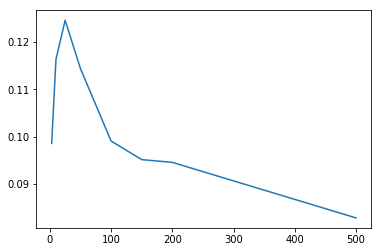

0.12455518584879695
Fri Mar 22 00:50:14 2019 [Fee.__init__] initialized succesfully
Fri Mar 22 00:50:15 2019 [Fee.__init__] initialized succesfully
Fri Mar 22 00:50:17 2019 [Fee.__init__] initialized succesfully
Fri Mar 22 00:50:18 2019 [Fee.__init__] initialized succesfully
Fri Mar 22 00:50:20 2019 [Fee.__init__] initialized succesfully
Fri Mar 22 00:50:22 2019 [Fee.__init__] initialized succesfully
Fri Mar 22 00:50:24 2019 [Fee.__init__] initialized succesfully
Fri Mar 22 00:50:27 2019 [Fee.__init__] initialized succesfully


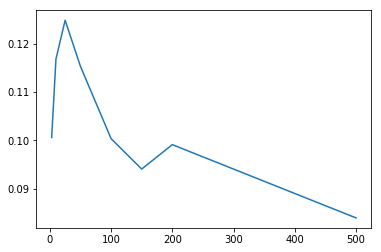

0.1249226829685913
Fri Mar 22 00:50:30 2019 [State.__init__] initialized succesfully
Fri Mar 22 00:50:31 2019 [State.__init__] initialized succesfully
Fri Mar 22 00:50:32 2019 [State.__init__] initialized succesfully
Fri Mar 22 00:50:34 2019 [State.__init__] initialized succesfully
Fri Mar 22 00:50:35 2019 [State.__init__] initialized succesfully
Fri Mar 22 00:50:37 2019 [State.__init__] initialized succesfully
Fri Mar 22 00:50:39 2019 [State.__init__] initialized succesfully
Fri Mar 22 00:50:41 2019 [State.__init__] initialized succesfully


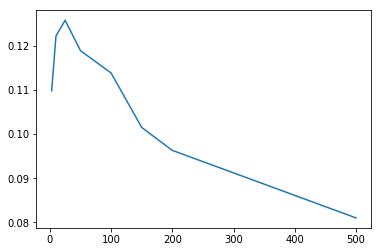

0.1257174138909803
Fri Mar 22 00:50:46 2019 [VideoAmt.__init__] initialized succesfully
Fri Mar 22 00:50:47 2019 [VideoAmt.__init__] initialized succesfully
Fri Mar 22 00:50:48 2019 [VideoAmt.__init__] initialized succesfully
Fri Mar 22 00:50:50 2019 [VideoAmt.__init__] initialized succesfully
Fri Mar 22 00:50:52 2019 [VideoAmt.__init__] initialized succesfully
Fri Mar 22 00:50:54 2019 [VideoAmt.__init__] initialized succesfully
Fri Mar 22 00:50:56 2019 [VideoAmt.__init__] initialized succesfully
Fri Mar 22 00:50:59 2019 [VideoAmt.__init__] initialized succesfully


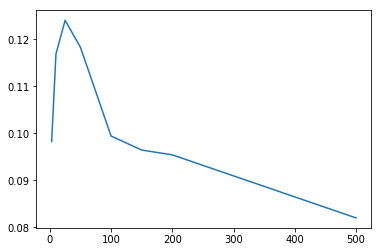

0.1240315973352529
Fri Mar 22 00:51:03 2019 [PhotoAmt.__init__] initialized succesfully
Fri Mar 22 00:51:04 2019 [PhotoAmt.__init__] initialized succesfully
Fri Mar 22 00:51:05 2019 [PhotoAmt.__init__] initialized succesfully
Fri Mar 22 00:51:07 2019 [PhotoAmt.__init__] initialized succesfully
Fri Mar 22 00:51:08 2019 [PhotoAmt.__init__] initialized succesfully
Fri Mar 22 00:51:10 2019 [PhotoAmt.__init__] initialized succesfully
Fri Mar 22 00:51:13 2019 [PhotoAmt.__init__] initialized succesfully
Fri Mar 22 00:51:15 2019 [PhotoAmt.__init__] initialized succesfully


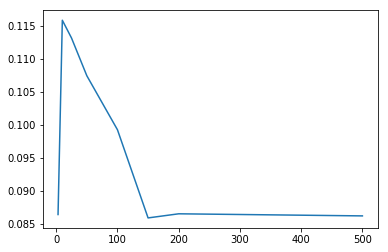

0.1158206721275062


In [227]:
X,Y=reset(f=dogs)
cols = X.columns
res = []
for col in cols:
    X,Y = reset(f=dogs)
    X=X.drop(col,axis=1)
    scaled = pd.DataFrame()
    for ccol in X:
        df = X[ccol]
        scaled[ccol] = (df - df.mean()) / (df.max() - df.min())
    X=scaled
    res.append([col,score_knn(name=col)])

In [228]:
res

[['Age', None],
 ['Breed1', None],
 ['Breed2', None],
 ['Gender', None],
 ['Color1', None],
 ['Color2', None],
 ['Color3', None],
 ['MaturitySize', None],
 ['FurLength', None],
 ['Vaccinated', None],
 ['Dewormed', None],
 ['Sterilized', None],
 ['Health', None],
 ['Quantity', None],
 ['Fee', None],
 ['State', None],
 ['VideoAmt', None],
 ['PhotoAmt', None]]

In [231]:
X,Y=reset(f=dogs)

In [232]:
scaled = pd.DataFrame()
for col in X:
    df = X[col]
    scaled[col] = (df - df.mean()) / (df.max() - df.min())

In [233]:
X=scaled

Fri Mar 22 00:54:04 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:54:05 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:54:06 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:54:08 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:54:09 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:54:11 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:54:13 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:54:15 2019 [score_knn.__init__] initialized succesfully


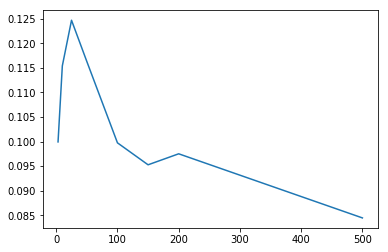

0.12472502511973801


In [234]:
score_knn()

In [237]:
X=X.drop(['Color2', 'Color3', 'Fee'],axis=1)

Fri Mar 22 00:55:43 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:55:44 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:55:45 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:55:46 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:55:47 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:55:48 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:55:50 2019 [score_knn.__init__] initialized succesfully


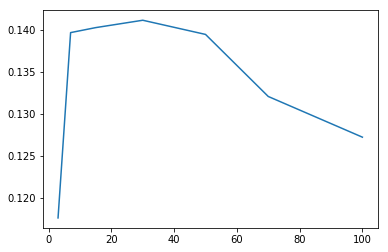

0.14114324152051125


In [239]:
score_knn([3,7,15,30,50,70,100])

In [251]:
X['Age']=X['Age']*20

Fri Mar 22 00:57:50 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:57:51 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:57:52 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:57:53 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:57:54 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:57:55 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 00:57:56 2019 [score_knn.__init__] initialized succesfully


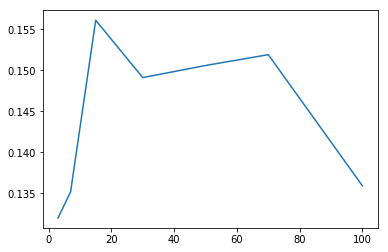

0.1561280591779381


In [252]:
score_knn([3,7,15,30,50,70,100])

In [263]:
X['Breed1'] = X['Breed1']*20

Fri Mar 22 01:00:36 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:00:37 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:00:37 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:00:38 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:00:39 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:00:40 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:00:41 2019 [score_knn.__init__] initialized succesfully


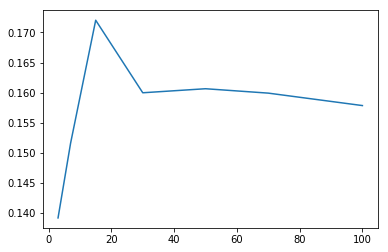

0.17203089499559737


In [264]:
score_knn([3,7,15,30,50,70,100])

In [269]:
X['PhotoAmt'] = X['PhotoAmt'] * 10

Fri Mar 22 01:02:25 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:02:26 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:02:27 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:02:27 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:02:28 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:02:29 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:02:30 2019 [score_knn.__init__] initialized succesfully


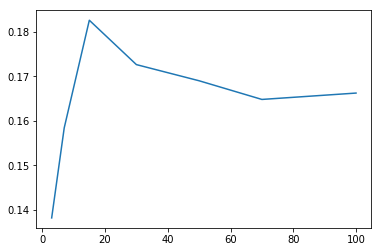

0.18266900661041793


In [270]:
score_knn([3,7,15,30,50,70,100])

In [272]:
X.head()

,Age,Breed1,Breed2,Gender,Color1,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,State,VideoAmt,PhotoAmt
0,-0.933818,2.925836,-0.257109,-0.369036,-0.012932,0.017175,0.267093,-0.334051,-0.271212,0.044638,-0.018938,-0.027727,-0.179305,-0.007332,1.089646
1,-0.698523,2.925836,-0.257109,0.130964,-0.179599,0.017175,-0.232907,-0.334051,-0.271212,0.044638,-0.018938,-0.027727,0.644871,-0.007332,1.422979
2,-0.933818,2.925836,-0.257109,-0.369036,-0.179599,0.017175,-0.232907,0.165949,0.228788,0.044638,-0.018938,-0.027727,-0.179305,-0.007332,-0.243687
3,-1.012249,2.925836,-0.257109,0.130964,-0.179599,0.017175,-0.232907,0.165949,0.228788,0.044638,-0.018938,0.235431,-0.179305,-0.007332,1.756313
4,-0.855386,2.925836,-0.257109,-0.369036,-0.179599,0.017175,-0.232907,0.165949,-0.271212,0.044638,-0.018938,-0.027727,0.644871,-0.007332,1.089646


In [273]:
refX = X # 0.182 normalized

In [276]:
X=X.drop('State',axis=1)

Fri Mar 22 01:04:54 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:04:54 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:04:55 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:04:56 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:04:57 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:04:58 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:04:59 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:05:00 2019 [score_knn.__init__] initialized succesfully


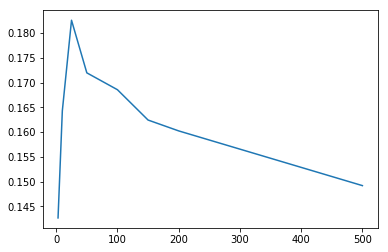

0.18259094150843766


In [278]:
score_knn()

In [302]:
X,Y=reset(f=dogs)

In [303]:
X['State_N'] = X['State'].map(state_N_mapping)

In [304]:
X['State_E'] = X['State'].map(state_E_mapping)

In [305]:
df = X["State_N"].astype(float)
X['State_N']=(df - df.mean()) / (df.max() - df.min())

In [306]:
df = X["State_E"].astype(float)
X['State_E']=(df - df.mean()) / (df.max() - df.min())

In [307]:
newX=refX

In [308]:
newX['State_N']=X['State_N']
newX['State_E']=X['State_E']

In [309]:
X=newX.drop('State',axis=1)

In [311]:
X['State_N'] = X['State_N'] * 10
X['State_E'] = X['State_E'] * 10

Fri Mar 22 01:12:08 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:12:08 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:12:09 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:12:10 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:12:11 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:12:12 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:12:13 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:12:15 2019 [score_knn.__init__] initialized succesfully


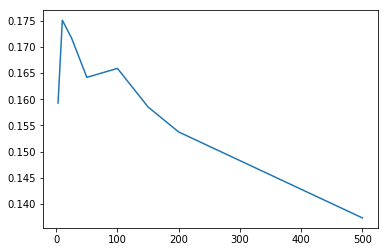

0.17511496562792392


In [312]:
score_knn()

In [314]:
X=X.drop(['State_E','State_N'],axis=1)

Fri Mar 22 01:12:39 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:12:39 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:12:40 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:12:41 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:12:42 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:12:43 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:12:44 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:12:45 2019 [score_knn.__init__] initialized succesfully


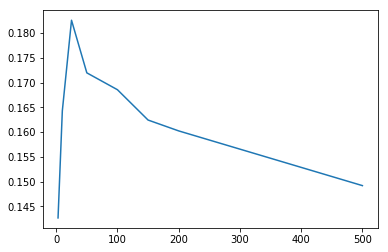

0.18259094150843766


In [315]:
score_knn()

In [318]:
X=X.drop('Color1',axis=1)

In [320]:
_X=X

In [321]:
X=refX

Fri Mar 22 01:14:07 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:14:07 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:14:08 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:14:09 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:14:10 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:14:11 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:14:13 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:14:14 2019 [score_knn.__init__] initialized succesfully


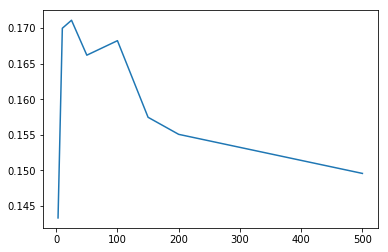

0.17110101240980669


In [322]:
score_knn()

Fri Mar 22 01:14:34 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:14:35 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:14:35 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:14:36 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:14:37 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:14:38 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:14:39 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:14:40 2019 [score_knn.__init__] initialized succesfully


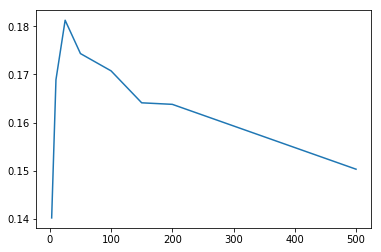

0.1812464752692341


In [323]:
X=_X
score_knn()

In [326]:
X['Color1'] = refX['Color1']

Fri Mar 22 01:15:26 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:15:27 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:15:28 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:15:28 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:15:29 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:15:30 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:15:31 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:15:33 2019 [score_knn.__init__] initialized succesfully


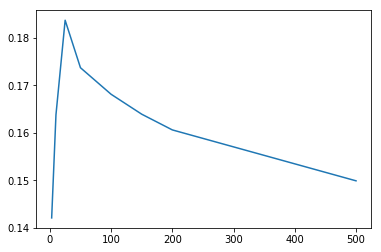

0.1836468370344494


In [327]:
score_knn()

In [329]:
X.head(1)

,Age,Breed1,Breed2,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,VideoAmt,PhotoAmt,Color1
0,-0.933818,2.925836,-0.257109,-0.369036,0.017175,0.267093,-0.334051,-0.271212,0.044638,-0.018938,-0.027727,-0.007332,1.089646,-0.012932


<h1>CHECKPOINT</h1>
<p>Look like weighting on the scaled is pretty effective, 0.183 with the scaling above. The idea of 2d mapping doesn't work.Now I try one hot encoding</p>

In [330]:
checkX=X

In [332]:
X,Y=reset(f=dogs)

In [338]:
X=checkX.join(pd.get_dummies(X['Breed1'])).drop('Breed1',axis=1)

Fri Mar 22 01:20:53 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:20:56 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:20:59 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:21:03 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:21:08 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:21:14 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:21:20 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:21:27 2019 [score_knn.__init__] initialized succesfully


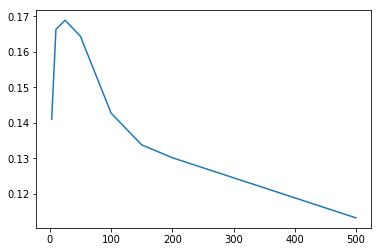

0.16890020256256147


In [340]:
score_knn()

Fri Mar 22 01:28:04 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:28:05 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:28:06 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:28:06 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:28:07 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:28:08 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:28:08 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:28:09 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:28:10 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:28:10 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:28:11 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:28:12 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:28:13 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:28:13 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:28:14 

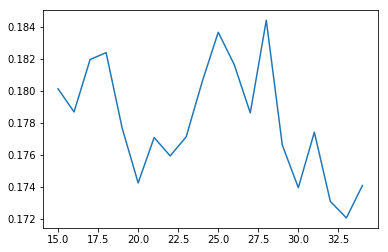

0.1843970138252449


In [343]:
X=checkX
score_knn(list(range(15,35)))

In [347]:
X.head(1)

,Age,Breed1,Breed2,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,VideoAmt,PhotoAmt,Color1
0,-0.933818,2.925836,-0.257109,-0.369036,0.017175,0.267093,-0.334051,-0.271212,0.044638,-0.018938,-0.027727,-0.007332,1.089646,-0.012932


<h1>SEARCH</h1>

In [373]:
# cats dogs
dogs = train[train['Type'] == 1].drop('Type',axis=1)
cats = train[train['Type'] == 2].drop('Type',axis=1)

In [374]:
def reset(f=train):
    to_drop = ["Unnamed: 0", "dataset_type", "Name", "RescuerID", "Description","PetID"]

    X = f.drop(["AdoptionSpeed"] + to_drop , axis=1)
    Y = f['AdoptionSpeed']
    X = X.reset_index().drop('index',axis=1)
    Y = Y.reset_index().drop('index',axis=1)['AdoptionSpeed']

    assert X.shape[0] == Y.shape[0]
    return X,Y

In [375]:
def scale(X):
    for col in X.columns:
        X[col] = (X[col] - X[col].mean()) / (X[col].max() - X[col].min())
scale(X)

In [450]:
def score_knn(space=[5,15,25,50,100],name="score_knn",plot=False):
    # X Y in memory
    score = []
    for k in space:
        model = PredictiveModel(name, k)
        score.append(model.validation(X, Y, method=2, verbose=False))
    print(max(score))
    if plot:
        plt.plot(space, score)
        plt.show()
    return max(score)

Fri Mar 22 01:40:46 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:40:49 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:40:52 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:40:55 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:40:59 2019 [score_knn.__init__] initialized succesfully


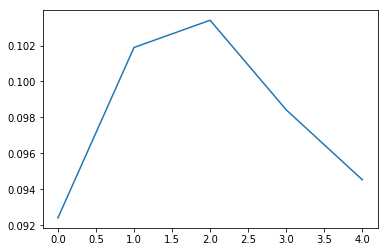

0.1034057174859299


In [382]:
X,Y=reset()
scale(X)
complete_score = score_knn()

Fri Mar 22 01:41:03 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:41:04 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:41:06 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:41:07 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:41:08 2019 [score_knn.__init__] initialized succesfully


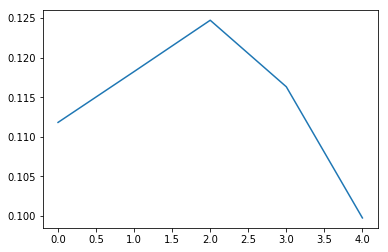

0.12472502511973801


In [383]:
X,Y=reset(f=dogs)
scale(X)
dog_score = score_knn()

Fri Mar 22 01:41:10 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:41:11 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:41:12 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:41:13 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 01:41:15 2019 [score_knn.__init__] initialized succesfully


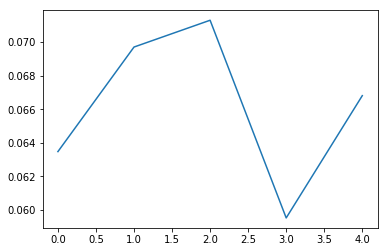

0.07130545816625891


In [384]:
X,Y=reset(f=cats)
scale(X)
cat_score = score_knn()

<h2>Before search scores</h2>

In [385]:
complete_score, dog_score, cat_score

(0.1034057174859299, 0.12472502511973801, 0.07130545816625891)

In [386]:
X,Y=reset()
scale(X)

In [393]:
multipliers = list(range(-100,100,10))

In [415]:
f=train
X,Y=reset()
cols = X.columns
complete_res = []
for col in cols:
    print(col)
    col_res = []
    for m in multipliers:
        print(m)
        X,Y=reset()
        scale(X)
        X[col] = X[col] * m
        col_res.append(score_knn())
    print(col_res)
    complete_res.append(col_res)
df = pd.DataFrame(complete_res,index=cols,columns=multipliers)
import pickle as pk
pk.dump({'df':df}, open("complete_knn_score.pkl","wb+"))

Type
-100
Fri Mar 22 02:02:12 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:02:15 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:02:18 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:02:21 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:02:25 2019 [score_knn.__init__] initialized succesfully
0.10322091236570914
-90
Fri Mar 22 02:02:30 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:02:32 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:02:35 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:02:38 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:02:42 2019 [score_knn.__init__] initialized succesfully
0.10322091236570914
-80
Fri Mar 22 02:02:47 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:02:49 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:02:53 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:02:56 2019 [score_

0.1340969788306672
-90
Fri Mar 22 02:08:09 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:08:11 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:08:12 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:08:14 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:08:17 2019 [score_knn.__init__] initialized succesfully
0.13539204392660809
-80
Fri Mar 22 02:08:20 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:08:21 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:08:23 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:08:25 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:08:28 2019 [score_knn.__init__] initialized succesfully
0.1312931425619572
-70
Fri Mar 22 02:08:31 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:08:33 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:08:34 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:08:37 

0.1051761534920993
-80
Fri Mar 22 02:12:29 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:12:31 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:12:33 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:12:35 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:12:37 2019 [score_knn.__init__] initialized succesfully
0.103702442902101
-70
Fri Mar 22 02:12:40 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:12:41 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:12:43 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:12:45 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:12:48 2019 [score_knn.__init__] initialized succesfully
0.10279928192431793
-60
Fri Mar 22 02:12:50 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:12:52 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:12:54 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:12:56 2

Fri Mar 22 02:16:27 2019 [score_knn.__init__] initialized succesfully
0.09791378803097617
-70
Fri Mar 22 02:16:30 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:16:32 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:16:34 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:16:36 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:16:39 2019 [score_knn.__init__] initialized succesfully
0.10020570361304418
-60
Fri Mar 22 02:16:42 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:16:44 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:16:47 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:16:49 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:16:52 2019 [score_knn.__init__] initialized succesfully
0.09978333482071063
-50
Fri Mar 22 02:16:55 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:16:57 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:16:5

Fri Mar 22 02:20:54 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:20:56 2019 [score_knn.__init__] initialized succesfully
0.09406807329070381
-60
Fri Mar 22 02:20:59 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:21:01 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:21:03 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:21:05 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:21:08 2019 [score_knn.__init__] initialized succesfully
0.09406807329070381
-50
Fri Mar 22 02:21:11 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:21:13 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:21:15 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:21:17 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:21:20 2019 [score_knn.__init__] initialized succesfully
0.09406807329070381
-40
Fri Mar 22 02:21:23 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:21:2

Fri Mar 22 02:24:59 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:25:01 2019 [score_knn.__init__] initialized succesfully
0.07987870148305587
-50
Fri Mar 22 02:25:04 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:25:06 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:25:07 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:25:09 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:25:12 2019 [score_knn.__init__] initialized succesfully
0.07987870148305587
-40
Fri Mar 22 02:25:14 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:25:16 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:25:18 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:25:20 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:25:22 2019 [score_knn.__init__] initialized succesfully
0.07987870148305587
-30
Fri Mar 22 02:25:25 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:25:2

Fri Mar 22 02:28:36 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:28:38 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:28:40 2019 [score_knn.__init__] initialized succesfully
0.09094934400239485
-40
Fri Mar 22 02:28:42 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:28:43 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:28:45 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:28:46 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:28:48 2019 [score_knn.__init__] initialized succesfully
0.09094934400239485
-30
Fri Mar 22 02:28:50 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:28:52 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:28:53 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:28:55 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:28:57 2019 [score_knn.__init__] initialized succesfully
0.09094934400239485
-20
Fri Mar 22 02:28:5

Fri Mar 22 02:32:09 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:32:12 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:32:15 2019 [score_knn.__init__] initialized succesfully
0.10444303768938674
-30
Fri Mar 22 02:32:18 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:32:20 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:32:22 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:32:25 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:32:28 2019 [score_knn.__init__] initialized succesfully
0.10444303768938674
-20
Fri Mar 22 02:32:31 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:32:33 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:32:36 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:32:38 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:32:41 2019 [score_knn.__init__] initialized succesfully
0.10444303768938674
-10
Fri Mar 22 02:32:4

Fri Mar 22 02:37:04 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:37:06 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:37:09 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:37:12 2019 [score_knn.__init__] initialized succesfully
0.09762829217947189
-20
Fri Mar 22 02:37:16 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:37:19 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:37:21 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:37:24 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:37:27 2019 [score_knn.__init__] initialized succesfully
0.09762829217947189
-10
Fri Mar 22 02:37:31 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:37:33 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:37:36 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:37:39 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:37:42 2019 [score_knn.__init

Fri Mar 22 02:41:49 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:41:51 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:41:53 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:41:56 2019 [score_knn.__init__] initialized succesfully
0.09780893177167156
-10
Fri Mar 22 02:41:59 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:42:01 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:42:03 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:42:05 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:42:08 2019 [score_knn.__init__] initialized succesfully
0.09780893177167156
0
Fri Mar 22 02:42:11 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:42:13 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:42:16 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:42:19 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:42:23 2019 [score_knn.__init__

Fri Mar 22 02:46:17 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:46:19 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:46:21 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:46:24 2019 [score_knn.__init__] initialized succesfully
0.09793827872479503
0
Fri Mar 22 02:46:27 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:46:30 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:46:33 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:46:36 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:46:39 2019 [score_knn.__init__] initialized succesfully
0.1019080669064883
10
Fri Mar 22 02:46:44 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:46:45 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:46:48 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:46:50 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:46:52 2019 [score_knn.__init__] 

Fri Mar 22 02:50:24 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:50:27 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:50:30 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:50:34 2019 [score_knn.__init__] initialized succesfully
0.09560349875577197
10
Fri Mar 22 02:50:38 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:50:40 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:50:42 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:50:44 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:50:47 2019 [score_knn.__init__] initialized succesfully
0.09907399387022961
20
Fri Mar 22 02:50:50 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:50:52 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:50:54 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:50:56 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:50:59 2019 [score_knn.__init__

Fri Mar 22 02:55:07 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:55:09 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:55:11 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:55:14 2019 [score_knn.__init__] initialized succesfully
0.11551965088544743
20
Fri Mar 22 02:55:18 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:55:20 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:55:22 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:55:25 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:55:27 2019 [score_knn.__init__] initialized succesfully
0.11551965088544743
30
Fri Mar 22 02:55:31 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:55:33 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:55:35 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:55:38 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 02:55:41 2019 [score_knn.__init__

Fri Mar 22 03:00:59 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:01:02 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:01:06 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:01:10 2019 [score_knn.__init__] initialized succesfully
0.10471840596387819
30
Fri Mar 22 03:01:15 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:01:18 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:01:22 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:01:26 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:01:30 2019 [score_knn.__init__] initialized succesfully
0.10471840596387819
40
Fri Mar 22 03:01:35 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:01:38 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:01:42 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:01:45 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:01:49 2019 [score_knn.__init__

Fri Mar 22 03:06:45 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:06:47 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:06:50 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:06:53 2019 [score_knn.__init__] initialized succesfully
0.09521322681518077
40
Fri Mar 22 03:06:57 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:06:59 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:07:01 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:07:04 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:07:07 2019 [score_knn.__init__] initialized succesfully
0.09511755822140049
50
Fri Mar 22 03:07:11 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:07:13 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:07:16 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:07:18 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:07:21 2019 [score_knn.__init__

Fri Mar 22 03:12:36 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:12:39 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:12:42 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:12:47 2019 [score_knn.__init__] initialized succesfully
0.10220575759348036
50
Fri Mar 22 03:12:51 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:12:54 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:12:57 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:13:01 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:13:04 2019 [score_knn.__init__] initialized succesfully
0.10016033047068566
60
Fri Mar 22 03:13:09 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:13:12 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:13:15 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:13:18 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:13:22 2019 [score_knn.__init__

Fri Mar 22 03:17:34 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:17:36 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:17:39 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:17:42 2019 [score_knn.__init__] initialized succesfully
0.1055918666397844
60
Fri Mar 22 03:17:45 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:17:47 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:17:50 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:17:52 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:17:55 2019 [score_knn.__init__] initialized succesfully
0.10509066250256101
70
Fri Mar 22 03:17:59 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:18:01 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:18:03 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:18:06 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:18:09 2019 [score_knn.__init__]

Fri Mar 22 03:23:54 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:23:57 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:24:01 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:24:05 2019 [score_knn.__init__] initialized succesfully
0.10305685988617289
70
Fri Mar 22 03:24:10 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:24:13 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:24:17 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:24:20 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:24:25 2019 [score_knn.__init__] initialized succesfully
0.10305685988617289
80
Fri Mar 22 03:24:30 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:24:33 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:24:36 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:24:40 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:24:44 2019 [score_knn.__init__

Fri Mar 22 03:27:57 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:27:58 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:28:00 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:28:01 2019 [score_knn.__init__] initialized succesfully
0.0930187101353914
80
Fri Mar 22 03:28:03 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:28:05 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:28:06 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:28:07 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:28:09 2019 [score_knn.__init__] initialized succesfully
0.09311194935905669
90
Fri Mar 22 03:28:11 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:28:12 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:28:14 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:28:15 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:28:17 2019 [score_knn.__init__]

In [416]:
f=dogs
X,Y=reset(f=f)
cols = X.columns
complete_res = []
for col in cols:
    print(col)
    col_res = []
    for m in multipliers:
        print(m)
        X,Y=reset(f=f)
        scale(X)
        X[col] = X[col] * m
        col_res.append(score_knn())
    print(col_res)
    complete_res.append(col_res)
df = pd.DataFrame(complete_res,index=cols,columns=multipliers)
import pickle as pk
pk.dump({'df':df}, open("dogs_knn_score.pkl","wb+"))

Age
-100
Fri Mar 22 03:28:19 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:28:19 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:28:20 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:28:21 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:28:22 2019 [score_knn.__init__] initialized succesfully
0.13892542320632947
-90
Fri Mar 22 03:28:23 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:28:24 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:28:25 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:28:25 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:28:26 2019 [score_knn.__init__] initialized succesfully
0.14307459615433718
-80
Fri Mar 22 03:28:28 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:28:28 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:28:29 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:28:30 2019 [score_k

0.1262971979499335
-90
Fri Mar 22 03:30:11 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:30:12 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:30:13 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:30:14 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:30:15 2019 [score_knn.__init__] initialized succesfully
0.12631243344328075
-80
Fri Mar 22 03:30:16 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:30:17 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:30:18 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:30:19 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:30:20 2019 [score_knn.__init__] initialized succesfully
0.12665386946792895
-70
Fri Mar 22 03:30:21 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:30:22 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:30:23 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:30:24

0.11577896706878295
-80
Fri Mar 22 03:32:01 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:32:02 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:32:03 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:32:04 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:32:05 2019 [score_knn.__init__] initialized succesfully
0.11531722956725374
-70
Fri Mar 22 03:32:06 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:32:07 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:32:08 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:32:09 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:32:10 2019 [score_knn.__init__] initialized succesfully
0.1150470745513255
-60
Fri Mar 22 03:32:11 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:32:12 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:32:13 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:32:14

0.1064711670787855
-70
Fri Mar 22 03:33:53 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:33:54 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:33:55 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:33:56 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:33:57 2019 [score_knn.__init__] initialized succesfully
0.1064711670787855
-60
Fri Mar 22 03:33:58 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:33:59 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:34:00 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:34:01 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:34:02 2019 [score_knn.__init__] initialized succesfully
0.1064711670787855
-50
Fri Mar 22 03:34:03 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:34:04 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:34:05 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:34:06 2

0.09717496163735669
-60
Fri Mar 22 03:35:40 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:35:40 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:35:41 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:35:42 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:35:43 2019 [score_knn.__init__] initialized succesfully
0.09717496163735669
-50
Fri Mar 22 03:35:44 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:35:45 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:35:46 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:35:46 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:35:47 2019 [score_knn.__init__] initialized succesfully
0.09717496163735669
-40
Fri Mar 22 03:35:49 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:35:49 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:35:50 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:35:5

Fri Mar 22 03:37:13 2019 [score_knn.__init__] initialized succesfully
0.10632311617997944
-50
Fri Mar 22 03:37:14 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:37:15 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:37:16 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:37:16 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:37:17 2019 [score_knn.__init__] initialized succesfully
0.10632311617997944
-40
Fri Mar 22 03:37:18 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:37:19 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:37:19 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:37:20 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:37:21 2019 [score_knn.__init__] initialized succesfully
0.10632311617997944
-30
Fri Mar 22 03:37:22 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:37:23 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:37:2

Fri Mar 22 03:38:50 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:38:51 2019 [score_knn.__init__] initialized succesfully
0.12237763109624447
-40
Fri Mar 22 03:38:52 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:38:53 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:38:55 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:38:56 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:38:57 2019 [score_knn.__init__] initialized succesfully
0.12237763109624447
-30
Fri Mar 22 03:38:59 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:39:00 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:39:01 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:39:02 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:39:03 2019 [score_knn.__init__] initialized succesfully
0.12237763109624447
-20
Fri Mar 22 03:39:05 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:39:0

Fri Mar 22 03:40:59 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:41:00 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:41:01 2019 [score_knn.__init__] initialized succesfully
0.11127490916365383
-30
Fri Mar 22 03:41:03 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:41:04 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:41:05 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:41:06 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:41:08 2019 [score_knn.__init__] initialized succesfully
0.11127490916365383
-20
Fri Mar 22 03:41:09 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:41:10 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:41:11 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:41:13 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:41:14 2019 [score_knn.__init__] initialized succesfully
0.11127490916365383
-10
Fri Mar 22 03:41:1

Fri Mar 22 03:43:02 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:43:03 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:43:04 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:43:05 2019 [score_knn.__init__] initialized succesfully
0.11519058117427405
-20
Fri Mar 22 03:43:06 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:43:07 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:43:08 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:43:09 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:43:10 2019 [score_knn.__init__] initialized succesfully
0.11519058117427405
-10
Fri Mar 22 03:43:12 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:43:12 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:43:13 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:43:14 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:43:15 2019 [score_knn.__init

Fri Mar 22 03:44:52 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:44:53 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:44:54 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:44:55 2019 [score_knn.__init__] initialized succesfully
0.11577644316072037
-10
Fri Mar 22 03:44:56 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:44:57 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:44:58 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:44:59 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:45:00 2019 [score_knn.__init__] initialized succesfully
0.11577644316072037
0
Fri Mar 22 03:45:01 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:45:02 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:45:03 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:45:05 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:45:06 2019 [score_knn.__init__

Fri Mar 22 03:46:36 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:46:37 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:46:38 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:46:39 2019 [score_knn.__init__] initialized succesfully
0.1191324170429815
0
Fri Mar 22 03:46:40 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:46:41 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:46:42 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:46:43 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:46:45 2019 [score_knn.__init__] initialized succesfully
0.11372399816670516
10
Fri Mar 22 03:46:47 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:46:47 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:46:48 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:46:49 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:46:50 2019 [score_knn.__init__] 

Fri Mar 22 03:48:27 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:48:28 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:48:30 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:48:31 2019 [score_knn.__init__] initialized succesfully
0.0977113367196989
10
Fri Mar 22 03:48:33 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:48:34 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:48:35 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:48:36 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:48:37 2019 [score_knn.__init__] initialized succesfully
0.13129695205313688
20
Fri Mar 22 03:48:38 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:48:39 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:48:40 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:48:41 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:48:42 2019 [score_knn.__init__]

Fri Mar 22 03:50:49 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:50:50 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:50:52 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:50:53 2019 [score_knn.__init__] initialized succesfully
0.12469163996948336
20
Fri Mar 22 03:50:55 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:50:57 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:50:58 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:51:00 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:51:01 2019 [score_knn.__init__] initialized succesfully
0.12469163996948336
30
Fri Mar 22 03:51:03 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:51:05 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:51:06 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:51:08 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:51:09 2019 [score_knn.__init__

Fri Mar 22 03:53:19 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:53:20 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:53:22 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:53:23 2019 [score_knn.__init__] initialized succesfully
0.11678002257999243
30
Fri Mar 22 03:53:25 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:53:26 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:53:27 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:53:28 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:53:29 2019 [score_knn.__init__] initialized succesfully
0.11493555390959816
40
Fri Mar 22 03:53:31 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:53:32 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:53:33 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:53:34 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:53:36 2019 [score_knn.__init__

Fri Mar 22 03:55:46 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:55:47 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:55:48 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:55:50 2019 [score_knn.__init__] initialized succesfully
0.12093160653624682
40
Fri Mar 22 03:55:52 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:55:53 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:55:55 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:55:56 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:55:58 2019 [score_knn.__init__] initialized succesfully
0.11841779125184577
50
Fri Mar 22 03:56:00 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:56:01 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:56:02 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:56:04 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:56:05 2019 [score_knn.__init__

Fri Mar 22 03:57:56 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:57:57 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:57:58 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:57:59 2019 [score_knn.__init__] initialized succesfully
0.12789915501783755
50
Fri Mar 22 03:58:00 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:58:01 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:58:02 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:58:03 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:58:04 2019 [score_knn.__init__] initialized succesfully
0.12832488302856798
60
Fri Mar 22 03:58:06 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:58:07 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:58:08 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:58:09 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 03:58:10 2019 [score_knn.__init__

Fri Mar 22 04:00:27 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:00:29 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:00:30 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:00:32 2019 [score_knn.__init__] initialized succesfully
0.1208570228923876
60
Fri Mar 22 04:00:34 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:00:35 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:00:37 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:00:38 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:00:40 2019 [score_knn.__init__] initialized succesfully
0.1208570228923876
70
Fri Mar 22 04:00:42 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:00:43 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:00:45 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:00:46 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:00:48 2019 [score_knn.__init__] 

Fri Mar 22 04:02:16 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:02:16 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:02:17 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:02:18 2019 [score_knn.__init__] initialized succesfully
0.1075509744799839
70
Fri Mar 22 04:02:18 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:02:19 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:02:20 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:02:20 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:02:21 2019 [score_knn.__init__] initialized succesfully
0.10703381006515858
80
Fri Mar 22 04:02:22 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:02:22 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:02:23 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:02:24 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:02:24 2019 [score_knn.__init__]

In [417]:
f=cats
X,Y=reset(f=f)
cols = X.columns
complete_res = []
for col in cols:
    print(col)
    col_res = []
    for m in multipliers:
        print(m)
        X,Y=reset(f=f)
        scale(X)
        X[col] = X[col] * m
        col_res.append(score_knn())
    print(col_res)
    complete_res.append(col_res)
df = pd.DataFrame(complete_res,index=cols,columns=multipliers)
import pickle as pk
pk.dump({'df':df}, open("cats_knn_score.pkl","wb+"))

Age
-100
Fri Mar 22 04:02:28 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:02:29 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:02:30 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:02:30 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:02:31 2019 [score_knn.__init__] initialized succesfully
0.12021993366184074
-90
Fri Mar 22 04:02:32 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:02:33 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:02:33 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:02:34 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:02:35 2019 [score_knn.__init__] initialized succesfully
0.12042926288016834
-80
Fri Mar 22 04:02:36 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:02:36 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:02:37 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:02:38 2019 [score_k

0.06915166735708415
-90
Fri Mar 22 04:03:59 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:03:59 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:04:00 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:04:01 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:04:02 2019 [score_knn.__init__] initialized succesfully
0.07135089000967669
-80
Fri Mar 22 04:04:03 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:04:04 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:04:05 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:04:06 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:04:07 2019 [score_knn.__init__] initialized succesfully
0.06971042552908546
-70
Fri Mar 22 04:04:08 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:04:09 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:04:10 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:04:1

Fri Mar 22 04:05:42 2019 [score_knn.__init__] initialized succesfully
0.06585740223237375
-80
Fri Mar 22 04:05:43 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:05:44 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:05:44 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:05:45 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:05:46 2019 [score_knn.__init__] initialized succesfully
0.06672381333235924
-70
Fri Mar 22 04:05:47 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:05:48 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:05:49 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:05:49 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:05:50 2019 [score_knn.__init__] initialized succesfully
0.06645333823859172
-60
Fri Mar 22 04:05:51 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:05:52 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:05:5

Fri Mar 22 04:07:13 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:07:13 2019 [score_knn.__init__] initialized succesfully
0.06686385985804488
-70
Fri Mar 22 04:07:14 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:07:15 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:07:16 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:07:16 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:07:17 2019 [score_knn.__init__] initialized succesfully
0.06686385985804488
-60
Fri Mar 22 04:07:18 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:07:19 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:07:19 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:07:20 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:07:21 2019 [score_knn.__init__] initialized succesfully
0.06686385985804488
-50
Fri Mar 22 04:07:22 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:07:2

Fri Mar 22 04:08:30 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:08:30 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:08:31 2019 [score_knn.__init__] initialized succesfully
0.04943817098141941
-60
Fri Mar 22 04:08:32 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:08:32 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:08:33 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:08:34 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:08:34 2019 [score_knn.__init__] initialized succesfully
0.04943817098141941
-50
Fri Mar 22 04:08:35 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:08:36 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:08:36 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:08:37 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:08:38 2019 [score_knn.__init__] initialized succesfully
0.04943817098141941
-40
Fri Mar 22 04:08:3

Fri Mar 22 04:09:37 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:09:38 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:09:38 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:09:39 2019 [score_knn.__init__] initialized succesfully
0.056070713115204195
-50
Fri Mar 22 04:09:40 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:09:40 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:09:41 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:09:41 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:09:42 2019 [score_knn.__init__] initialized succesfully
0.056070713115204195
-40
Fri Mar 22 04:09:42 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:09:43 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:09:43 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:09:44 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:09:44 2019 [score_knn.__in

Fri Mar 22 04:10:42 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:10:43 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:10:44 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:10:44 2019 [score_knn.__init__] initialized succesfully
0.07360868215638501
-40
Fri Mar 22 04:10:45 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:10:46 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:10:47 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:10:47 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:10:48 2019 [score_knn.__init__] initialized succesfully
0.07360868215638501
-30
Fri Mar 22 04:10:49 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:10:50 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:10:51 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:10:51 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:10:52 2019 [score_knn.__init

Fri Mar 22 04:12:09 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:12:10 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:12:11 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:12:12 2019 [score_knn.__init__] initialized succesfully
0.0674559707989475
-30
Fri Mar 22 04:12:13 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:12:14 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:12:14 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:12:15 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:12:16 2019 [score_knn.__init__] initialized succesfully
0.0674559707989475
-20
Fri Mar 22 04:12:17 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:12:18 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:12:19 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:12:20 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:12:21 2019 [score_knn.__init__

Fri Mar 22 04:13:39 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:13:39 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:13:40 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:13:41 2019 [score_knn.__init__] initialized succesfully
0.07008092735375249
-20
Fri Mar 22 04:13:42 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:13:43 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:13:44 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:13:44 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:13:45 2019 [score_knn.__init__] initialized succesfully
0.07008092735375249
-10
Fri Mar 22 04:13:46 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:13:47 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:13:48 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:13:49 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:13:49 2019 [score_knn.__init

Fri Mar 22 04:15:07 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:15:07 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:15:08 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:15:09 2019 [score_knn.__init__] initialized succesfully
0.06577392482044157
-10
Fri Mar 22 04:15:10 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:15:11 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:15:11 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:15:12 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:15:13 2019 [score_knn.__init__] initialized succesfully
0.06577392482044157
0
Fri Mar 22 04:15:14 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:15:15 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:15:16 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:15:17 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:15:18 2019 [score_knn.__init__

Fri Mar 22 04:16:32 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:16:33 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:16:34 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:16:34 2019 [score_knn.__init__] initialized succesfully
0.06534017961750267
0
Fri Mar 22 04:16:36 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:16:36 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:16:37 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:16:38 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:16:39 2019 [score_knn.__init__] initialized succesfully
0.0628277395833419
10
Fri Mar 22 04:16:41 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:16:41 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:16:42 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:16:43 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:16:43 2019 [score_knn.__init__] 

Fri Mar 22 04:18:01 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:18:02 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:18:03 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:18:04 2019 [score_knn.__init__] initialized succesfully
0.056993920535303944
10
Fri Mar 22 04:18:05 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:18:06 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:18:07 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:18:08 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:18:09 2019 [score_knn.__init__] initialized succesfully
0.08672794872144274
20
Fri Mar 22 04:18:10 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:18:11 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:18:11 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:18:12 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:18:13 2019 [score_knn.__init_

Fri Mar 22 04:19:55 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:19:56 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:19:57 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:19:58 2019 [score_knn.__init__] initialized succesfully
0.07144719373384989
20
Fri Mar 22 04:20:00 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:20:01 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:20:02 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:20:03 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:20:04 2019 [score_knn.__init__] initialized succesfully
0.07144719373384989
30
Fri Mar 22 04:20:06 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:20:07 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:20:08 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:20:09 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:20:10 2019 [score_knn.__init__

Fri Mar 22 04:21:43 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:21:43 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:21:44 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:21:45 2019 [score_knn.__init__] initialized succesfully
0.06938391988265799
30
Fri Mar 22 04:21:46 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:21:47 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:21:48 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:21:49 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:21:50 2019 [score_knn.__init__] initialized succesfully
0.07149947763110458
40
Fri Mar 22 04:21:51 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:21:51 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:21:52 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:21:53 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:21:54 2019 [score_knn.__init__

Fri Mar 22 04:23:28 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:23:29 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:23:30 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:23:32 2019 [score_knn.__init__] initialized succesfully
0.06834835147033066
40
Fri Mar 22 04:23:33 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:23:34 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:23:35 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:23:36 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:23:37 2019 [score_knn.__init__] initialized succesfully
0.06873405331140621
50
Fri Mar 22 04:23:38 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:23:39 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:23:40 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:23:41 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:23:42 2019 [score_knn.__init__

Fri Mar 22 04:25:02 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:25:02 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:25:03 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:25:04 2019 [score_knn.__init__] initialized succesfully
0.07088438724923565
50
Fri Mar 22 04:25:05 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:25:06 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:25:06 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:25:07 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:25:08 2019 [score_knn.__init__] initialized succesfully
0.06762352993968268
60
Fri Mar 22 04:25:09 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:25:10 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:25:11 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:25:11 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:25:12 2019 [score_knn.__init__

Fri Mar 22 04:26:55 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:26:56 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:26:58 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:26:59 2019 [score_knn.__init__] initialized succesfully
0.0744351764987727
60
Fri Mar 22 04:27:00 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:27:01 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:27:02 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:27:03 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:27:05 2019 [score_knn.__init__] initialized succesfully
0.0744351764987727
70
Fri Mar 22 04:27:06 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:27:07 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:27:08 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:27:09 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:27:10 2019 [score_knn.__init__] 

Fri Mar 22 04:28:17 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:28:18 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:28:18 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:28:19 2019 [score_knn.__init__] initialized succesfully
0.07452298838490057
70
Fri Mar 22 04:28:19 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:28:20 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:28:20 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:28:21 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:28:21 2019 [score_knn.__init__] initialized succesfully
0.0738915329442531
80
Fri Mar 22 04:28:22 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:28:22 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:28:23 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:28:23 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 04:28:24 2019 [score_knn.__init__]

<h1>Obtained grid search for dimension proportionality learning</h1>

In [446]:
print("col = {}, scale = factor {}, residual = improvement {}".format(X.columns[0], np.argmax((df - cat_score).iloc[0,:]), max((df - cat_score).iloc[0,:])))

col = Age, scale = factor -90, residual = improvement 0.049123804713909425


In [454]:
X,Y=reset(f=cats)

In [455]:
scale(X)

Fri Mar 22 13:13:09 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:13:10 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:13:11 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:13:12 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:13:13 2019 [score_knn.__init__] initialized succesfully
0.07130545816625891


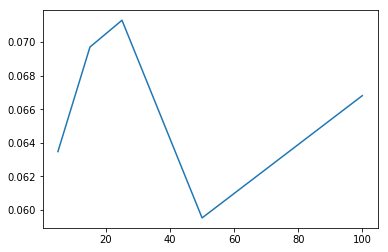

In [456]:
before_scaling = score_knn(plot=True)

In [457]:
X['Age'] = X['Age'] * (-90)

Fri Mar 22 13:13:14 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:13:15 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:13:16 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:13:16 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:13:17 2019 [score_knn.__init__] initialized succesfully
0.12042926288016834


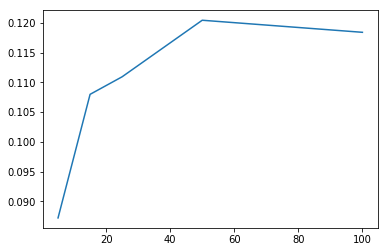

In [458]:
after_scaling = score_knn(plot=True)

residual improvement is correct

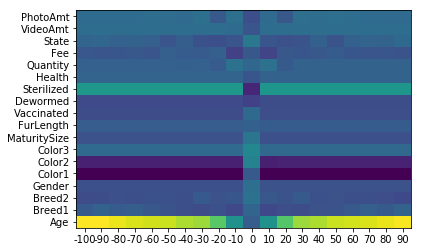

In [471]:
plt.pcolor(df)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.show()

Text(0.5, 1.0, 'Feature scaling residual improvement - Cats')

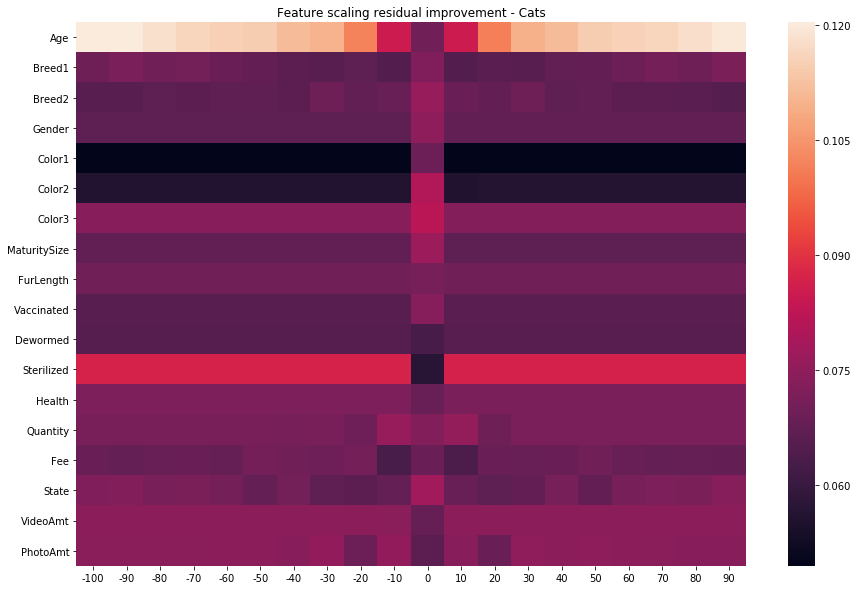

In [477]:
plt.figure(figsize=(15,10))
import seaborn as sns
sns.heatmap(df)
plt.title("Feature scaling residual improvement - Cats")

In [462]:
max((df - cat_score).iloc[0,:]) == after_scaling - before_scaling

True

In [463]:
for i, col in enumerate(X.columns):
    print("col = {}, scale = factor {}, residual = improvement {}".format(X.columns[i], np.argmax((df - cat_score).iloc[i,:]), max((df - cat_score).iloc[i,:])))

col = Age, scale = factor -90, residual = improvement 0.049123804713909425
col = Breed1, scale = factor 0, residual = improvement 0.0009847747030326537
col = Breed2, scale = factor 0, residual = improvement 0.004925731454507407
col = Gender, scale = factor 0, residual = improvement 0.003535676242481467
col = Color1, scale = factor 0, residual = improvement -0.002274063483210298
col = Color2, scale = factor 0, residual = improvement 0.009425926922483174
col = Color3, scale = factor 0, residual = improvement 0.01062870328414875
col = MaturitySize, scale = factor 0, residual = improvement 0.005808156664225905
col = FurLength, scale = factor 0, residual = improvement -0.00043095567643509913
col = Vaccinated, scale = factor 0, residual = improvement 0.0021622344828074735
col = Dewormed, scale = factor 10, residual = improvement -0.005384659766695887
col = Sterilized, scale = factor -100, residual = improvement 0.015621519215330476
col = Health, scale = factor -100, residual = improvement 0.

/Users/alex/Desktop/Coding/AI/kaggle-pets/venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


In [464]:
score_knn()

Fri Mar 22 13:17:03 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:17:04 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:17:05 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:17:06 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:17:06 2019 [score_knn.__init__] initialized succesfully
0.12042926288016834


0.12042926288016834

In [465]:
X=X.drop('Color3',axis=1)

In [479]:
score_knn()

Fri Mar 22 13:50:31 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:50:31 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:50:32 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:50:33 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:50:34 2019 [score_knn.__init__] initialized succesfully
0.12668143708537524


0.12668143708537524

In [484]:
X['Sterilized'] = X['Sterilized'] * 10

In [485]:
score_knn()

Fri Mar 22 13:51:17 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:51:17 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:51:18 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:51:19 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:51:20 2019 [score_knn.__init__] initialized succesfully
0.13066999751950528


0.13066999751950528

In [498]:
X=X.drop(['Color2'],axis=1)

Fri Mar 22 13:54:17 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:54:17 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:54:18 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:54:19 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:54:20 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:54:21 2019 [score_knn.__init__] initialized succesfully
0.13855640221837073


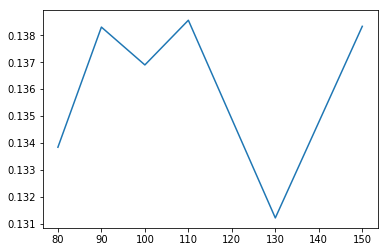

0.13855640221837073

In [500]:
score_knn(plot=True, space=[80,90,100,110,130,150])

In [501]:
_X=X

In [503]:
X=X.drop(['State'],axis=1)

Fri Mar 22 13:56:20 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:56:21 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:56:22 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:56:22 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:56:23 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:56:24 2019 [score_knn.__init__] initialized succesfully
0.14097407359558756


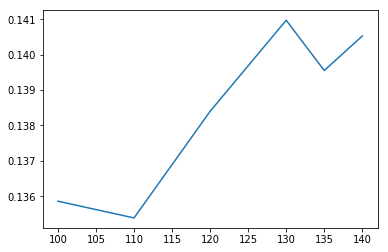

0.14097407359558756

In [506]:
score_knn(plot=True, space=[100,110,120,130,135,140])

<h1>Cats benchmark 0.1409</h1>

Fri Mar 22 13:59:15 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:59:16 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:59:17 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:59:18 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:59:19 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:59:20 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:59:22 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:59:23 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:59:24 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:59:26 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:59:27 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:59:29 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:59:31 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:59:32 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:59:34 

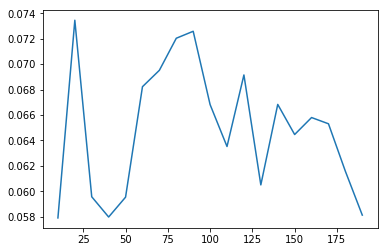

Fri Mar 22 13:59:44 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:59:44 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:59:45 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:59:46 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:59:47 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:59:47 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:59:48 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:59:49 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:59:50 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:59:51 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:59:51 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:59:52 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:59:53 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:59:55 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 13:59:56 

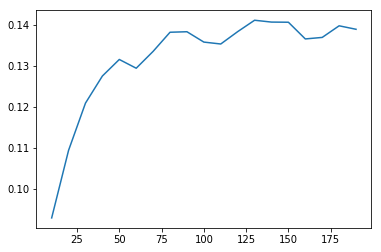

0.06772965982200933


In [508]:
X,Y = reset(f=cats)
scale(X)
before = score_knn(space=range(10,200,10),plot=True)
X=X.drop(['Color3','Color2','State'],axis=1)
X['Sterilized'] = X['Sterilized'] * 10
X['Age'] = X['Age'] * (-90)
after = score_knn(space=range(10,200,10),plot=True) # 0.141178
print(after - before) # improved by 0.06

dogs

In [512]:
df=pickle.load(open("dogs_knn_score.pkl","rb+"))['df']

Text(0.5, 1.0, 'Feature scaling residual improvement - Dogs')

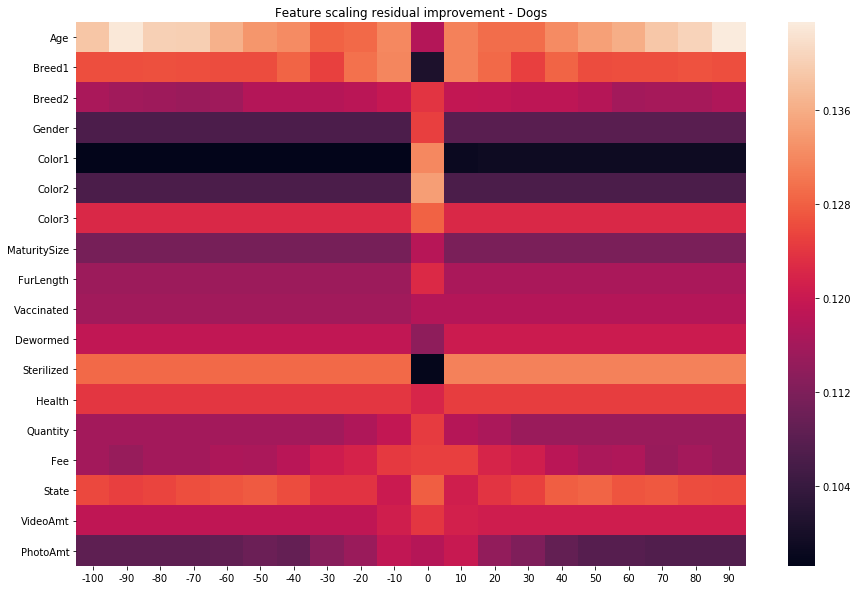

In [513]:
plt.figure(figsize=(15,10))
import seaborn as sns
sns.heatmap(df)
plt.title("Feature scaling residual improvement - Dogs")

In [708]:
X,Y = reset(f=dogs)
scale(X)

In [709]:
#score_knn(plot=True) # 0.12

In [710]:
X['Age'] = X['Age'] * (-90)

In [711]:
#score_knn(plot=True) #0.143

In [712]:
X = X.drop('Color3',axis=1)

In [713]:
# score_knn() # 0.1498

In [714]:
X = X.drop('State',axis=1)

In [715]:
# score_knn() # 0.159

In [716]:
X['Breed1'] = X['Breed1'] * 10

In [717]:
# score_knn() # 0.173

In [718]:
X['PhotoAmt']  = X['PhotoAmt'] * 10

In [719]:
# score_knn() # 0.184

In [720]:
X['Breed2'] = X['Breed2'] * 5

In [721]:
# score_knn() # 0.1878

In [722]:
X['Sterilized'] = X['Sterilized'] * 20

In [732]:
model = PredictiveModel(15)
model.validation(X, Y, method=2)

Fri Mar 22 17:38:02 2019 [15.__init__] initialized succesfully


0.1961122044692074

Fri Mar 22 17:37:15 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 17:37:16 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 17:37:17 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 17:37:17 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 17:37:18 2019 [score_knn.__init__] initialized succesfully
0.20057588187016745


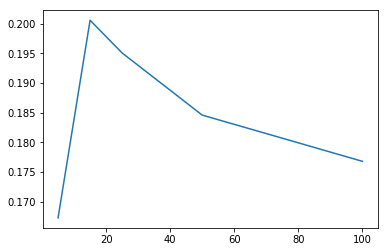

0.20057588187016745

In [730]:
score_knn(plot=True)

<h1>Dogs benchmark 0.20</h1>

Fri Mar 22 14:24:04 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 14:24:05 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 14:24:06 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 14:24:07 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 14:24:08 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 14:24:09 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 14:24:10 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 14:24:11 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 14:24:13 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 14:24:14 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 14:24:15 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 14:24:17 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 14:24:18 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 14:24:19 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 14:24:20 

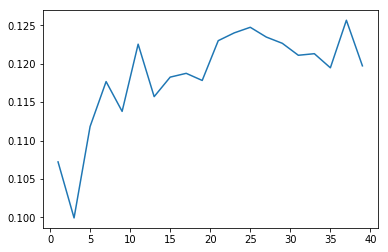

Fri Mar 22 14:24:29 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 14:24:30 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 14:24:30 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 14:24:31 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 14:24:32 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 14:24:32 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 14:24:33 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 14:24:34 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 14:24:35 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 14:24:35 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 14:24:36 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 14:24:37 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 14:24:38 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 14:24:38 2019 [score_knn.__init__] initialized succesfully
Fri Mar 22 14:24:39 

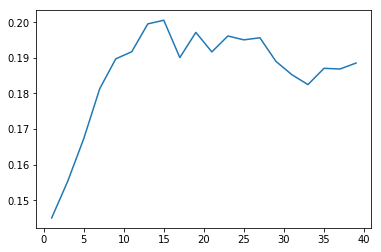

0.07493439552359496


In [705]:
X,Y = reset(f=dogs)
scale(X)
before = score_knn(space=range(1,40,2),plot=True)
X=X.drop(['Color3','State'],axis=1)
X['Sterilized'] = X['Sterilized'] * 20
X['Age'] = X['Age'] * (-90)
X['Breed1'] = X['Breed1'] * 10
X['PhotoAmt']  = X['PhotoAmt'] * 10
X['Breed2'] = X['Breed2'] * 5
after = score_knn(space=range(1,40,2),plot=True) # 0.141178
print(after - before) # improved by 0.06

complete

In [706]:
df=pickle.load(open("complete_knn_score.pkl","rb+"))['df']

Text(0.5, 1.0, 'Feature scaling residual improvement - Dogs')

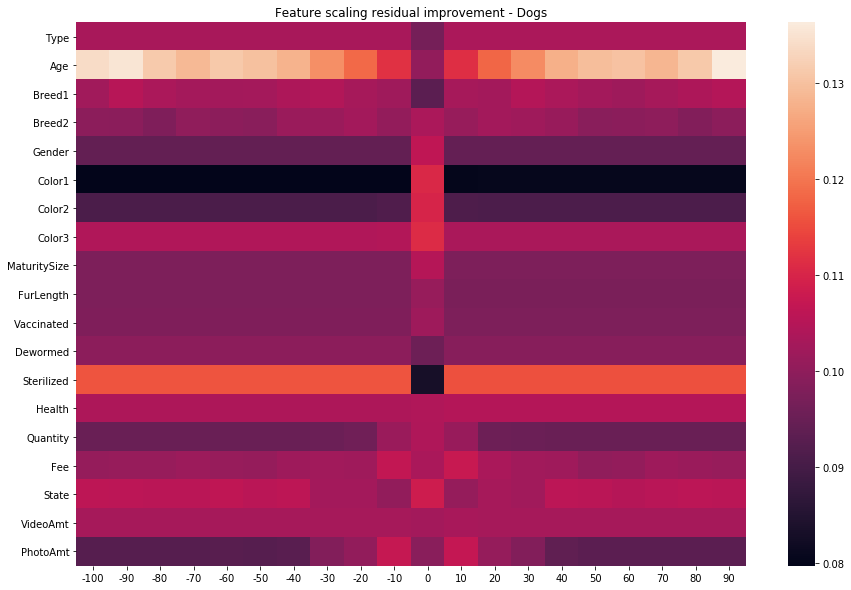

In [707]:
plt.figure(figsize=(15,10))
import seaborn as sns
sns.heatmap(df)
plt.title("Feature scaling residual improvement - Dogs")